1. http://aiden.nibali.org/blog/2017-01-18-mode-collapse-gans/

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.intra_op_parallelism_threads = 44
config.inter_op_parallelism_threads = 44
sess = tf.Session(config=config)

from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import numpy as np

from keras.layers import Input
from keras.layers.core import Activation
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

# Discriminator
D = Sequential()
D.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), input_shape=(28, 28, 1), padding='same', kernel_initializer=initializers.RandomNormal(stddev=0.02)))
D.add(LeakyReLU(0.2))
D.add(Dropout(0.3))
D.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), input_shape=(28, 28, 1), padding='same'))
D.add(LeakyReLU(0.2))
D.add(Dropout(0.3))
D.add(Flatten())
D.add(Dense(1))
D.add(Activation('sigmoid'))
D.summary()

# compile
optimizer = Adam(lr=0.0002, beta_1=0.5)
D.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [3]:
# Generator
G = Sequential()
G.add(Dense(input_dim=100, output_dim=128*7*7, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
G.add(LeakyReLU(0.2))
G.add(Reshape((7, 7, 128)))
G.add(UpSampling2D(size=(2, 2)))
G.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
G.add(LeakyReLU(0.2))
G.add(UpSampling2D(size=(2, 2)))
G.add(Conv2D(1, (5, 5), padding='same'))
G.add(Activation('tanh'))
G.summary()

# compile
G.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 64)        0         
__________

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6272, kernel_initializer=<keras.ini..., input_dim=100)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# compile GAN
D.trainable = False
GAN = Sequential()
GAN.add(G)
GAN.add(D)
GAN.compile(
    loss='binary_crossentropy', 
    optimizer=optimizer
)
D.trainable = True

('Epoch is', 0)
('Number of batches', 234)
batch 0 g_loss : 0.689337, d_loss : 0.700999
batch 50 g_loss : 0.647176, d_loss : 0.644024
batch 100 g_loss : 0.849311, d_loss : 0.662258
batch 150 g_loss : 0.772543, d_loss : 0.688401
batch 200 g_loss : 0.728103, d_loss : 0.732844


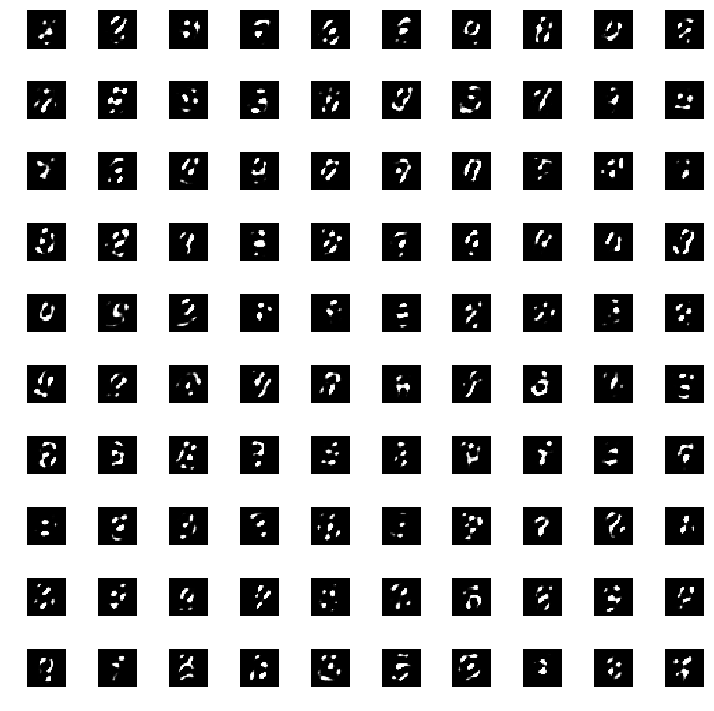

('Epoch is', 1)
('Number of batches', 234)
batch 0 g_loss : 0.924248, d_loss : 0.696437
batch 50 g_loss : 0.938308, d_loss : 0.642047
batch 100 g_loss : 0.942458, d_loss : 0.642485
batch 150 g_loss : 0.928614, d_loss : 0.645743
batch 200 g_loss : 0.862532, d_loss : 0.667932


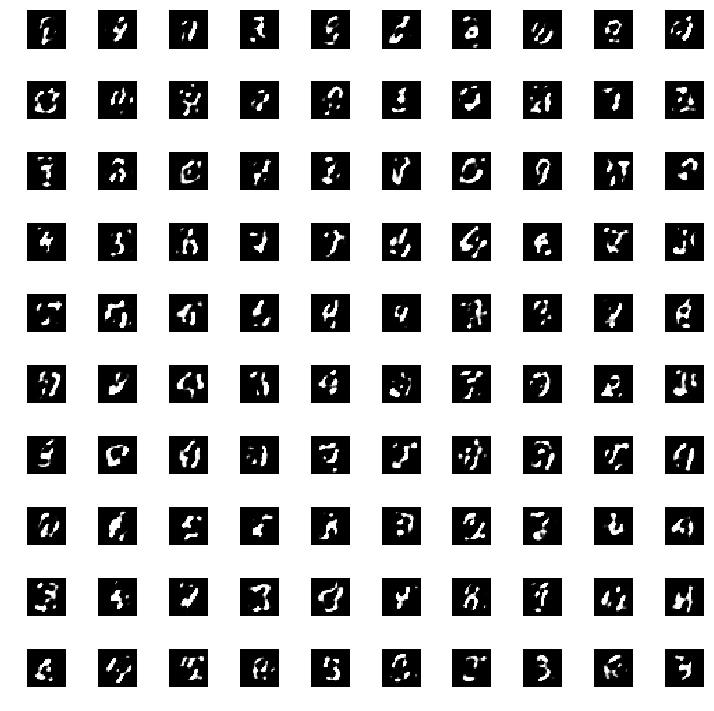

('Epoch is', 2)
('Number of batches', 234)
batch 0 g_loss : 0.907014, d_loss : 0.691501
batch 50 g_loss : 0.795191, d_loss : 0.700484
batch 100 g_loss : 0.900244, d_loss : 0.713335
batch 150 g_loss : 0.851875, d_loss : 0.650695
batch 200 g_loss : 0.846240, d_loss : 0.656600


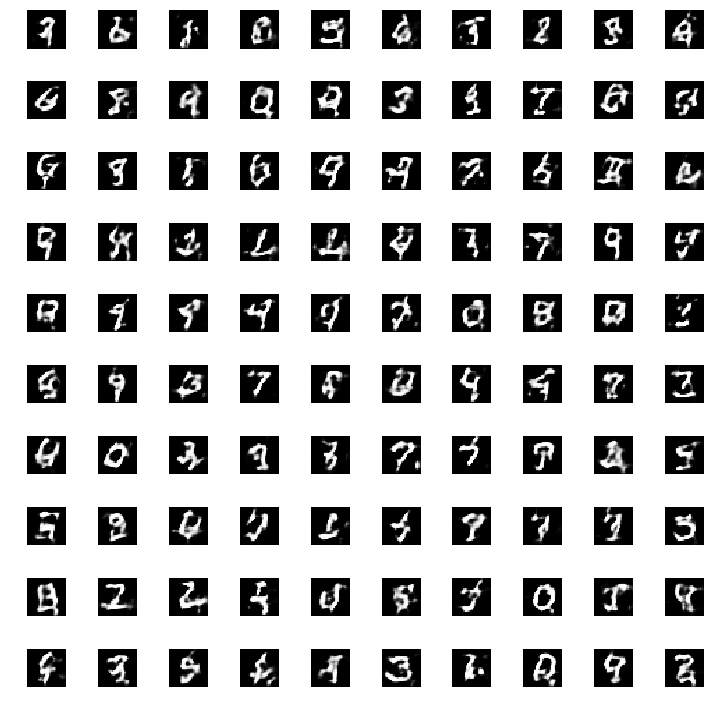

('Epoch is', 3)
('Number of batches', 234)
batch 0 g_loss : 0.879186, d_loss : 0.651528
batch 50 g_loss : 0.913166, d_loss : 0.632668
batch 100 g_loss : 0.774503, d_loss : 0.706714
batch 150 g_loss : 0.944028, d_loss : 0.646125
batch 200 g_loss : 0.962796, d_loss : 0.661583


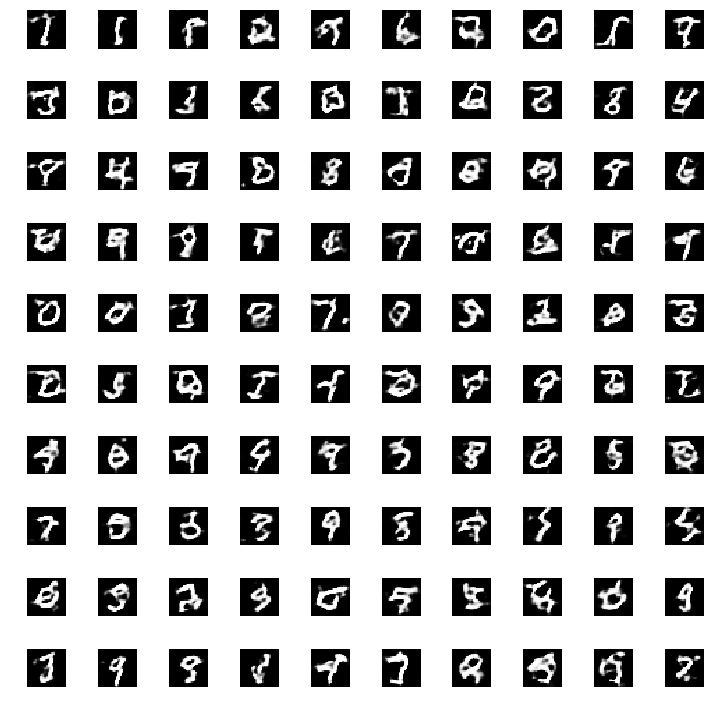

('Epoch is', 4)
('Number of batches', 234)
batch 0 g_loss : 0.828144, d_loss : 0.658770
batch 50 g_loss : 0.915636, d_loss : 0.645924
batch 100 g_loss : 0.930677, d_loss : 0.713298
batch 150 g_loss : 0.982130, d_loss : 0.661310
batch 200 g_loss : 0.888774, d_loss : 0.650355


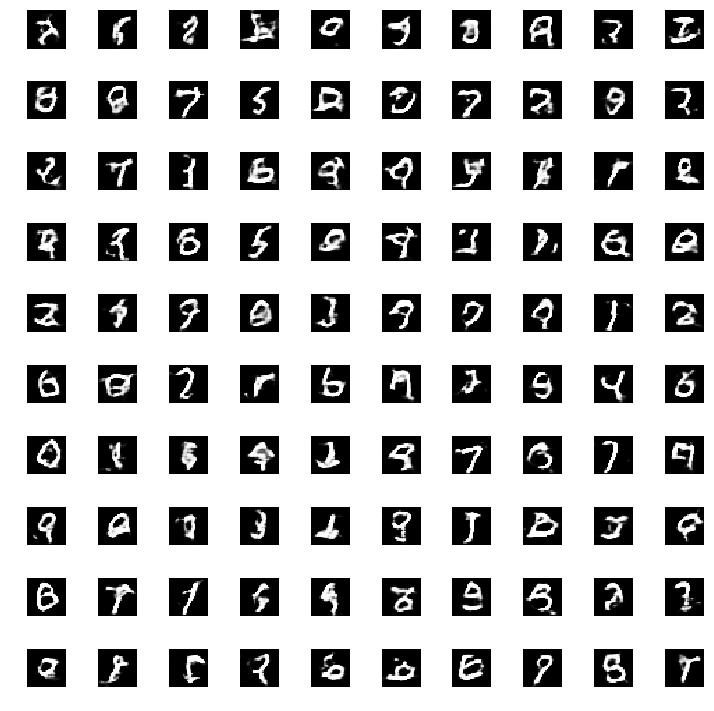

('Epoch is', 5)
('Number of batches', 234)
batch 0 g_loss : 0.851104, d_loss : 0.651246
batch 50 g_loss : 0.927542, d_loss : 0.662241
batch 100 g_loss : 0.898983, d_loss : 0.687387
batch 150 g_loss : 0.854430, d_loss : 0.655400
batch 200 g_loss : 0.801382, d_loss : 0.684206


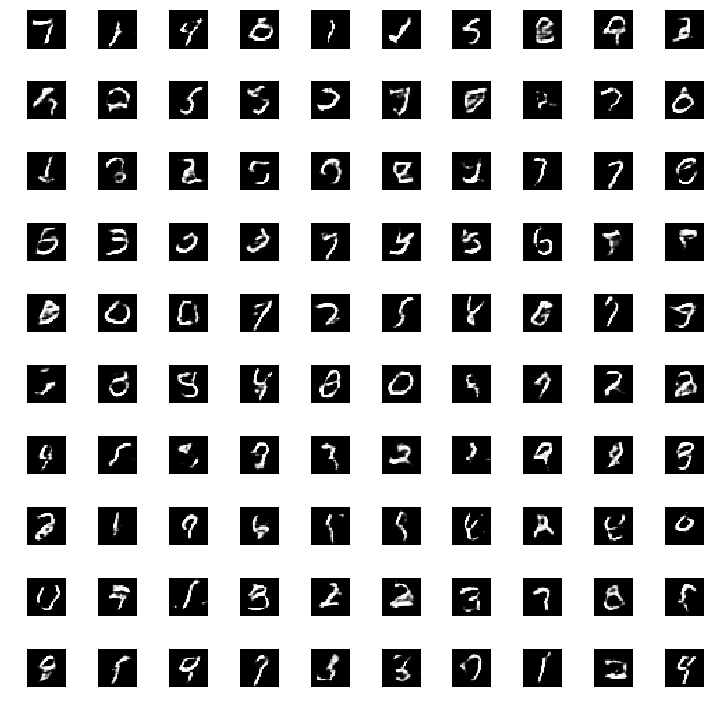

('Epoch is', 6)
('Number of batches', 234)
batch 0 g_loss : 0.956633, d_loss : 0.677027
batch 50 g_loss : 0.844069, d_loss : 0.662883
batch 100 g_loss : 0.844861, d_loss : 0.650779
batch 150 g_loss : 0.894411, d_loss : 0.684571
batch 200 g_loss : 0.781070, d_loss : 0.673807


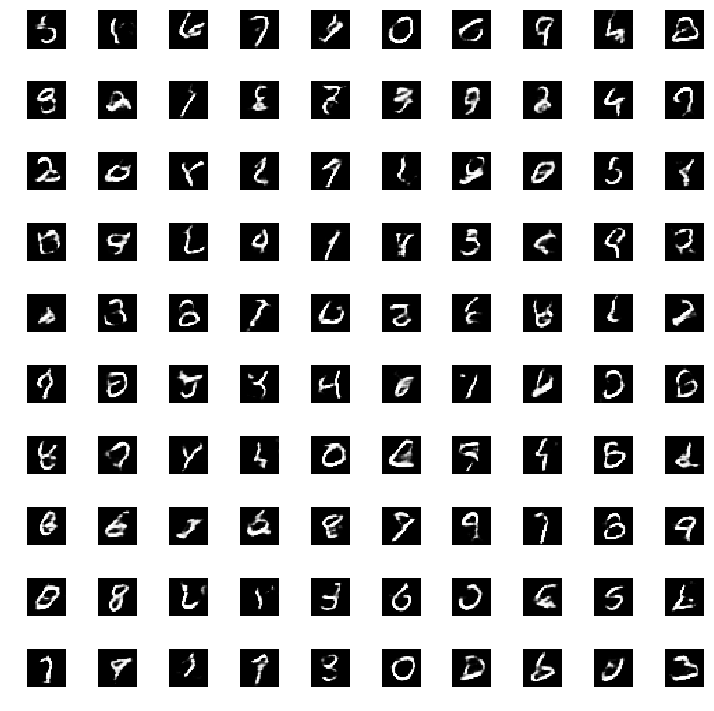

('Epoch is', 7)
('Number of batches', 234)
batch 0 g_loss : 0.948692, d_loss : 0.673862
batch 50 g_loss : 0.844090, d_loss : 0.650170
batch 100 g_loss : 0.911382, d_loss : 0.679756
batch 150 g_loss : 0.756131, d_loss : 0.664719
batch 200 g_loss : 0.915536, d_loss : 0.693552


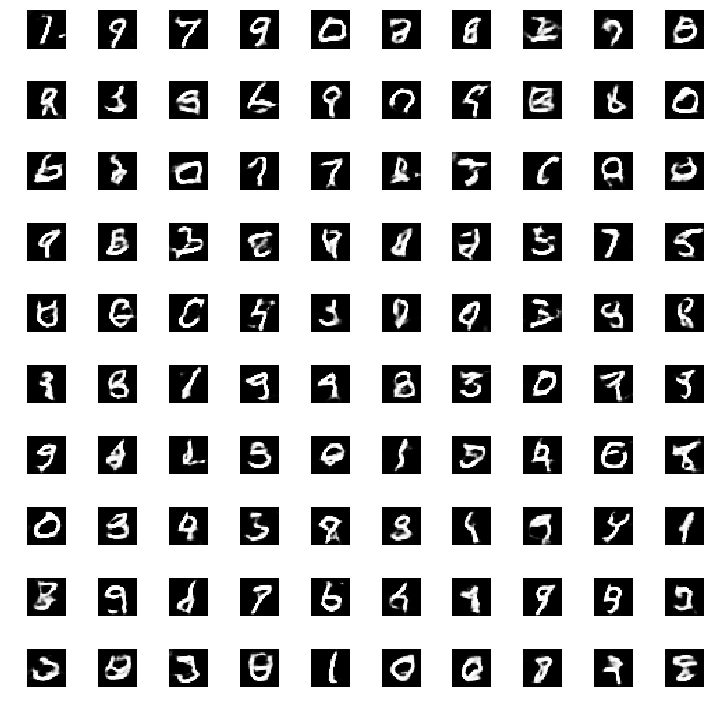

('Epoch is', 8)
('Number of batches', 234)
batch 0 g_loss : 0.852980, d_loss : 0.630066
batch 50 g_loss : 1.008317, d_loss : 0.653007
batch 100 g_loss : 0.871687, d_loss : 0.659013
batch 150 g_loss : 0.859153, d_loss : 0.652622
batch 200 g_loss : 0.831062, d_loss : 0.646046


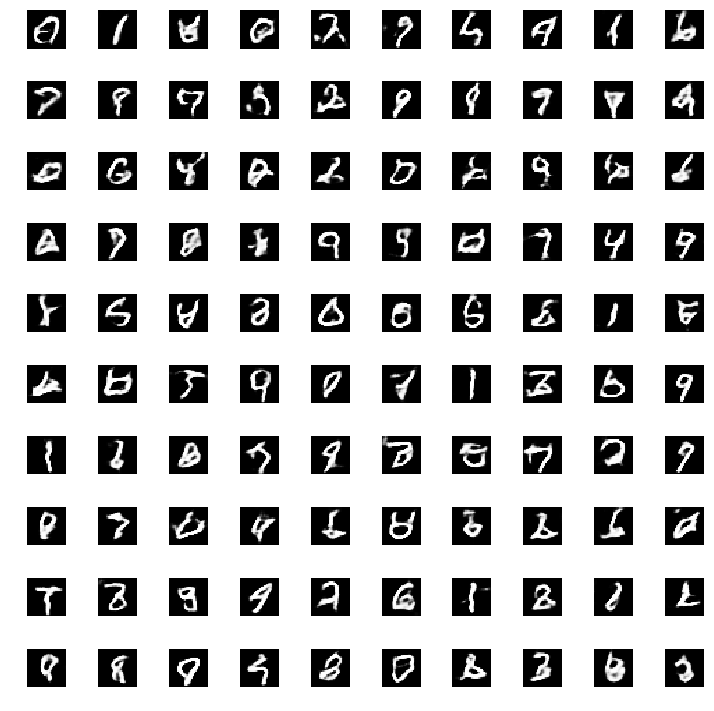

('Epoch is', 9)
('Number of batches', 234)
batch 0 g_loss : 0.892040, d_loss : 0.643042
batch 50 g_loss : 0.790608, d_loss : 0.673024
batch 100 g_loss : 0.962288, d_loss : 0.649385
batch 150 g_loss : 0.895027, d_loss : 0.670107
batch 200 g_loss : 0.878627, d_loss : 0.652428


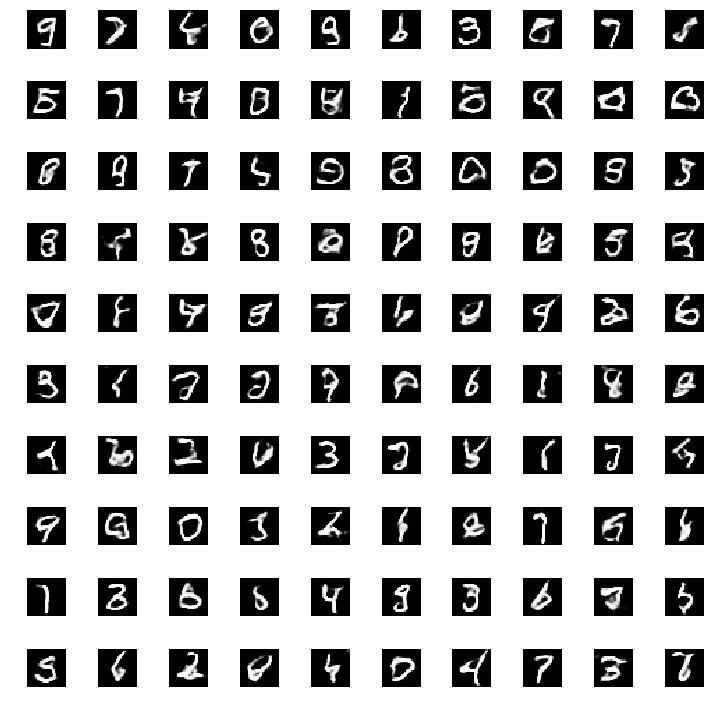

('Epoch is', 10)
('Number of batches', 234)
batch 0 g_loss : 0.964512, d_loss : 0.651583
batch 50 g_loss : 0.842722, d_loss : 0.656238
batch 100 g_loss : 0.837366, d_loss : 0.663437
batch 150 g_loss : 1.005604, d_loss : 0.718793
batch 200 g_loss : 0.925260, d_loss : 0.686224


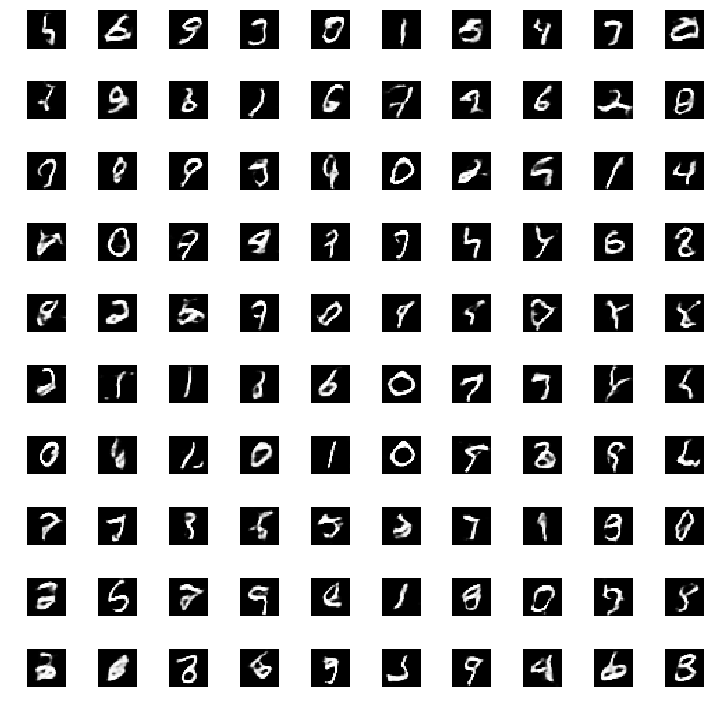

('Epoch is', 11)
('Number of batches', 234)
batch 0 g_loss : 0.920472, d_loss : 0.652862
batch 50 g_loss : 0.865593, d_loss : 0.654777
batch 100 g_loss : 0.917482, d_loss : 0.655506
batch 150 g_loss : 0.978591, d_loss : 0.656299
batch 200 g_loss : 0.901231, d_loss : 0.662679


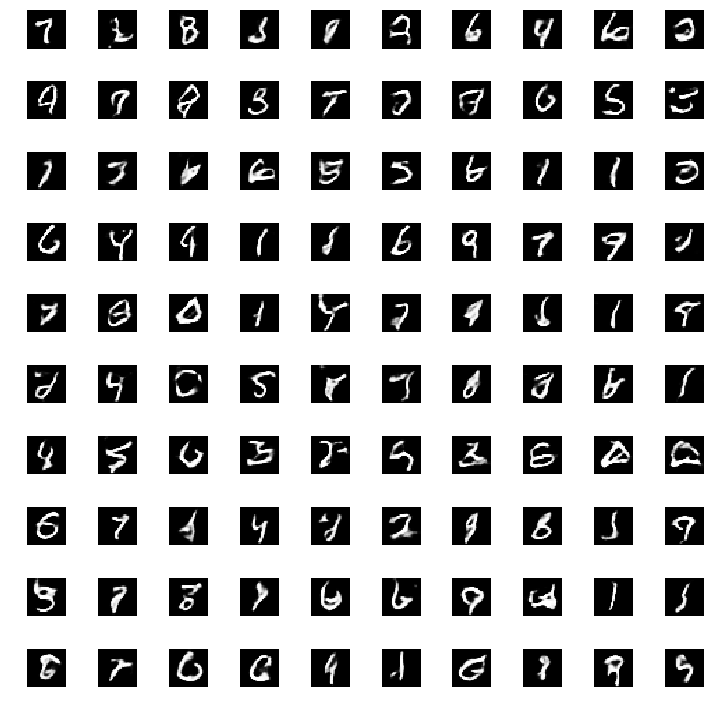

('Epoch is', 12)
('Number of batches', 234)
batch 0 g_loss : 0.872021, d_loss : 0.637712
batch 50 g_loss : 0.954871, d_loss : 0.646241
batch 100 g_loss : 1.018505, d_loss : 0.699491
batch 150 g_loss : 0.873596, d_loss : 0.656132
batch 200 g_loss : 0.840135, d_loss : 0.646732


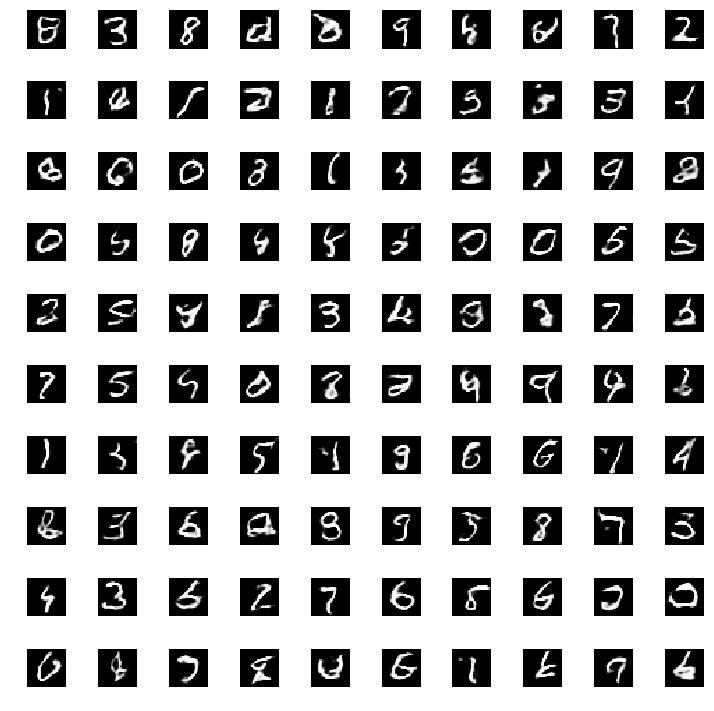

('Epoch is', 13)
('Number of batches', 234)
batch 0 g_loss : 0.881217, d_loss : 0.640515
batch 50 g_loss : 0.988696, d_loss : 0.660773
batch 100 g_loss : 0.876806, d_loss : 0.659232
batch 150 g_loss : 0.941137, d_loss : 0.653356
batch 200 g_loss : 0.941019, d_loss : 0.647809


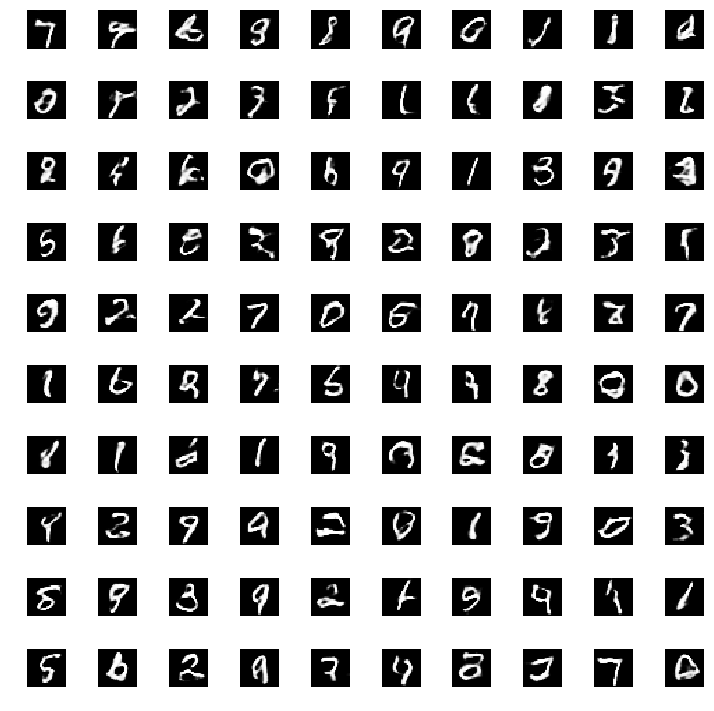

('Epoch is', 14)
('Number of batches', 234)
batch 0 g_loss : 0.804230, d_loss : 0.641585
batch 50 g_loss : 0.986250, d_loss : 0.632549
batch 100 g_loss : 1.044986, d_loss : 0.645876
batch 150 g_loss : 0.942493, d_loss : 0.664911
batch 200 g_loss : 1.056522, d_loss : 0.731997


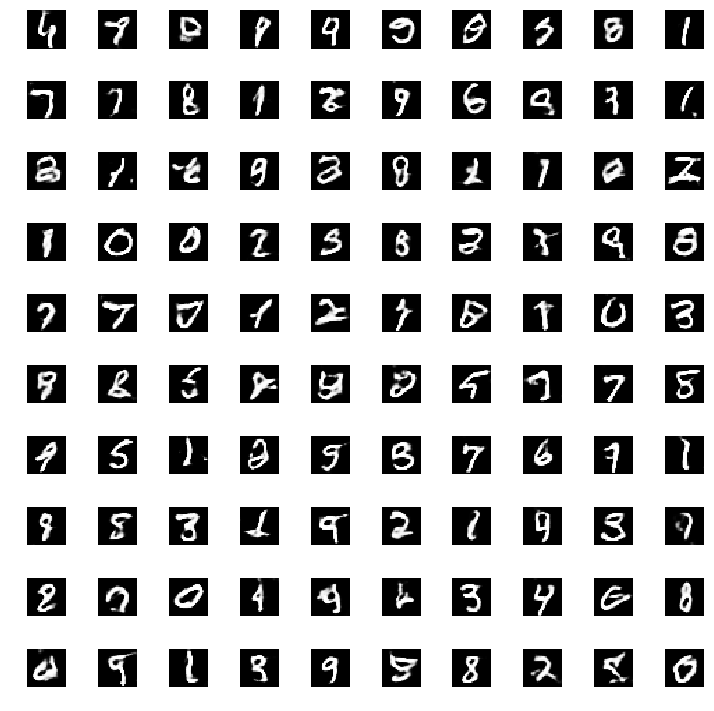

('Epoch is', 15)
('Number of batches', 234)
batch 0 g_loss : 0.914423, d_loss : 0.656010
batch 50 g_loss : 0.858018, d_loss : 0.639811
batch 100 g_loss : 1.050911, d_loss : 0.643870
batch 150 g_loss : 1.000118, d_loss : 0.652986
batch 200 g_loss : 1.007739, d_loss : 0.646156


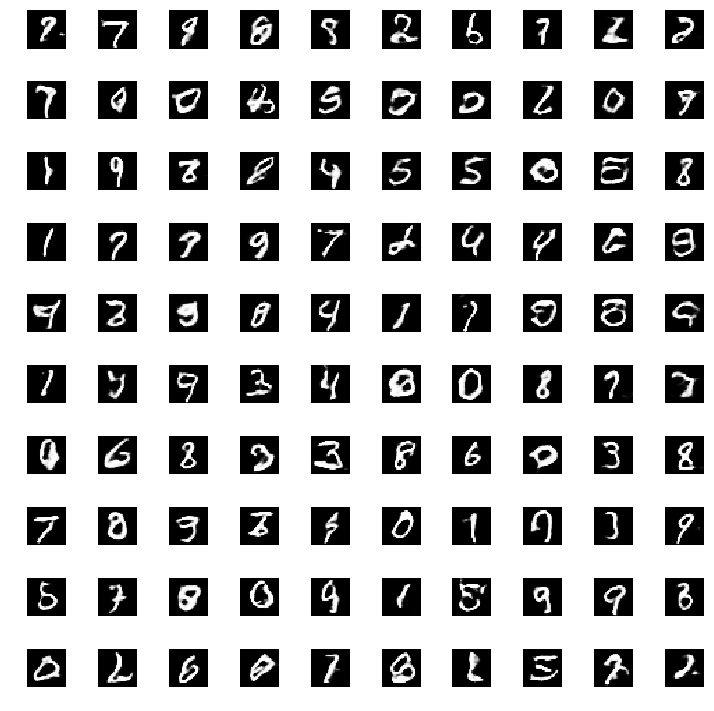

('Epoch is', 16)
('Number of batches', 234)
batch 0 g_loss : 0.805484, d_loss : 0.649740
batch 50 g_loss : 0.911474, d_loss : 0.652859
batch 100 g_loss : 0.779310, d_loss : 0.647711
batch 150 g_loss : 1.074948, d_loss : 0.656306
batch 200 g_loss : 1.026352, d_loss : 0.647376


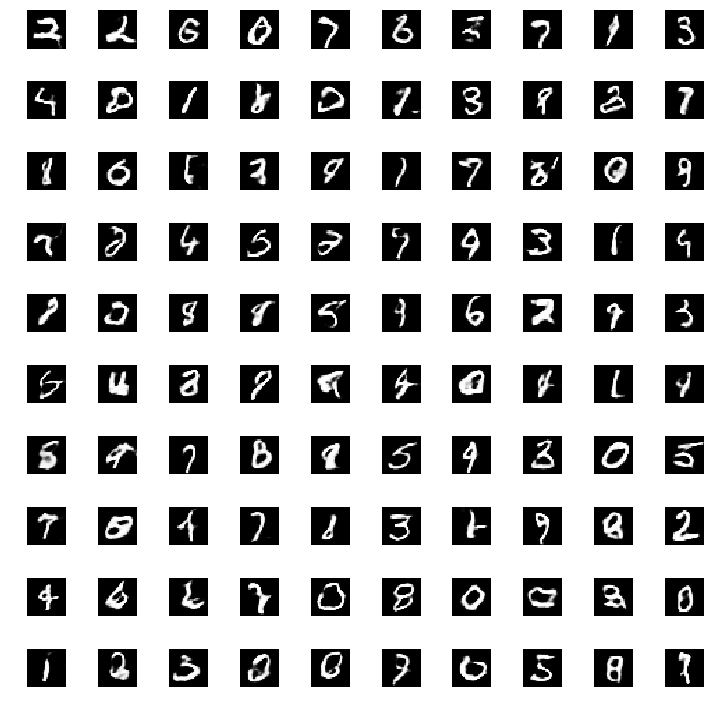

('Epoch is', 17)
('Number of batches', 234)
batch 0 g_loss : 0.799776, d_loss : 0.642296
batch 50 g_loss : 0.895410, d_loss : 0.636779
batch 100 g_loss : 0.909954, d_loss : 0.639164
batch 150 g_loss : 0.991227, d_loss : 0.660772
batch 200 g_loss : 0.984172, d_loss : 0.653454


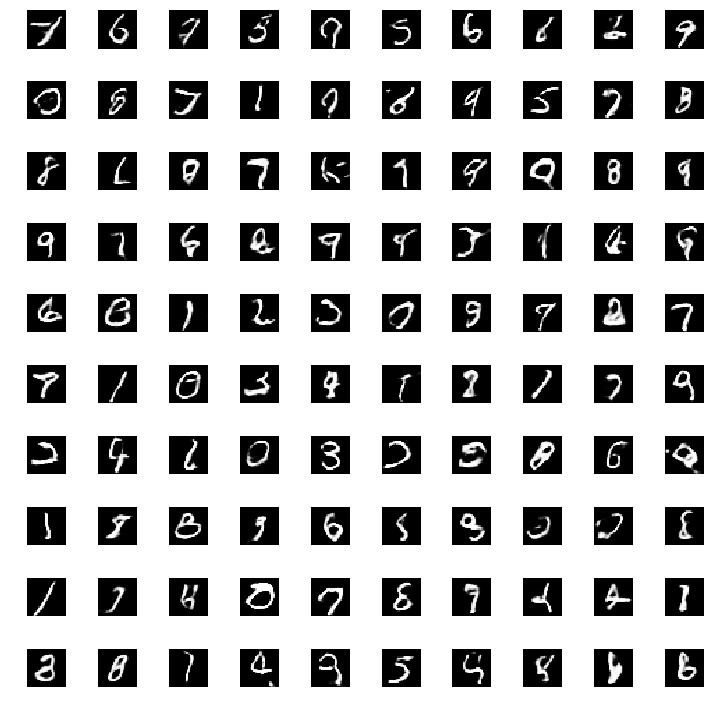

('Epoch is', 18)
('Number of batches', 234)
batch 0 g_loss : 1.023885, d_loss : 0.642935
batch 50 g_loss : 0.919146, d_loss : 0.638838
batch 100 g_loss : 1.156164, d_loss : 0.663155
batch 150 g_loss : 0.931608, d_loss : 0.637546
batch 200 g_loss : 1.014921, d_loss : 0.642278


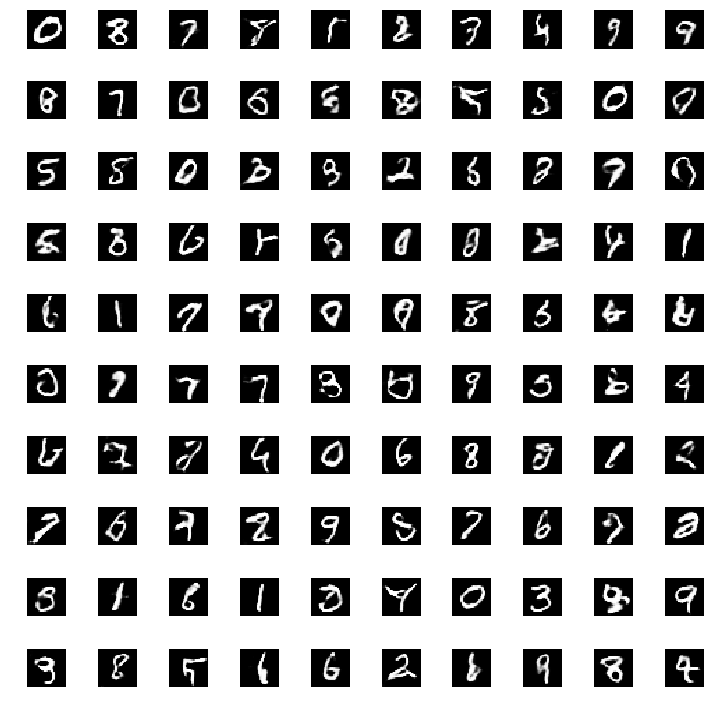

('Epoch is', 19)
('Number of batches', 234)
batch 0 g_loss : 1.111288, d_loss : 0.657809
batch 50 g_loss : 0.954694, d_loss : 0.703215
batch 100 g_loss : 1.236496, d_loss : 0.681427
batch 150 g_loss : 1.061117, d_loss : 0.636115
batch 200 g_loss : 0.908639, d_loss : 0.627895


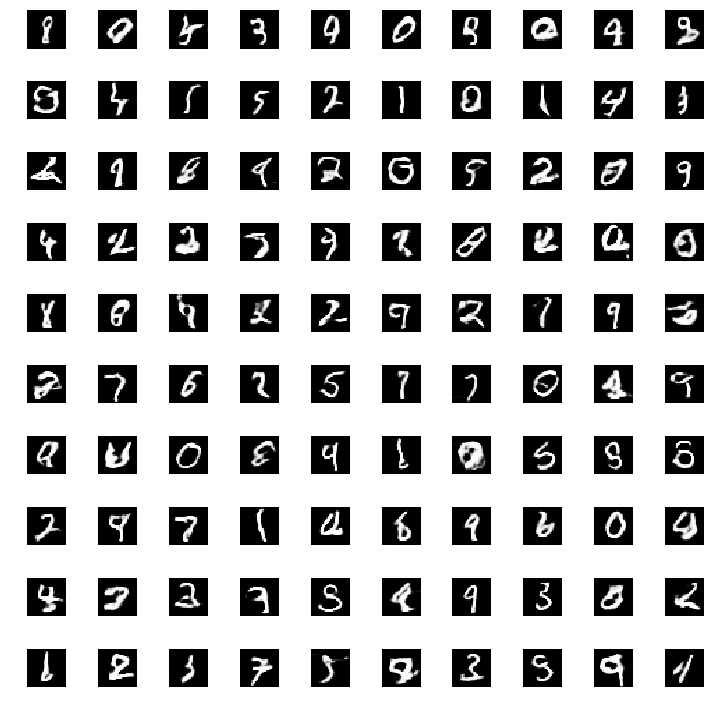

('Epoch is', 20)
('Number of batches', 234)
batch 0 g_loss : 0.932592, d_loss : 0.645579
batch 50 g_loss : 0.928430, d_loss : 0.658580
batch 100 g_loss : 0.936904, d_loss : 0.637800
batch 150 g_loss : 0.863366, d_loss : 0.640855
batch 200 g_loss : 0.959374, d_loss : 0.646907


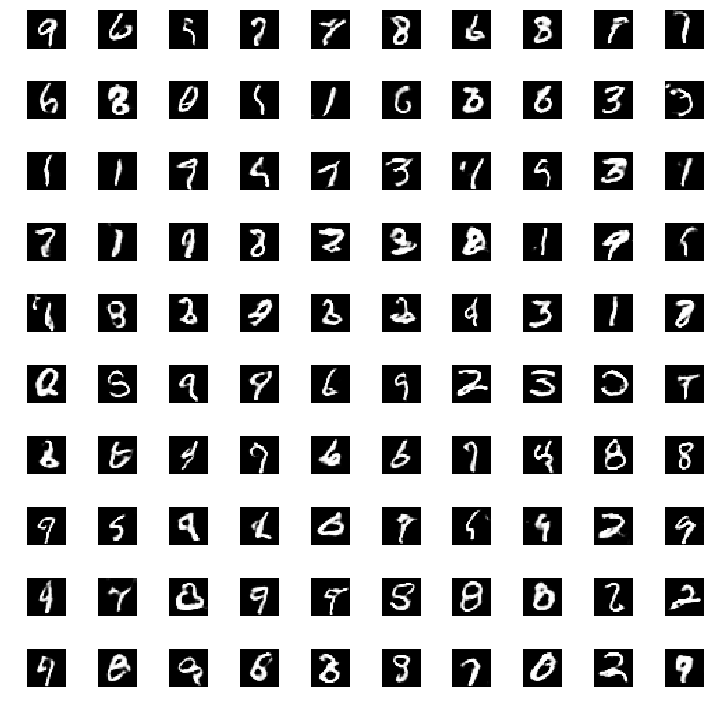

('Epoch is', 21)
('Number of batches', 234)
batch 0 g_loss : 0.990424, d_loss : 0.640103
batch 50 g_loss : 0.926613, d_loss : 0.645046
batch 100 g_loss : 0.975241, d_loss : 0.625576
batch 150 g_loss : 0.810257, d_loss : 0.656485
batch 200 g_loss : 0.948908, d_loss : 0.649654


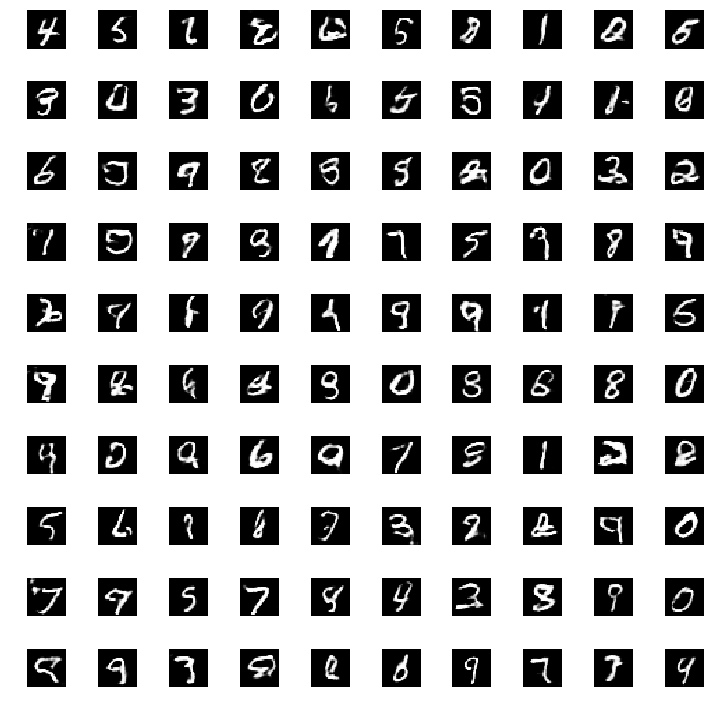

('Epoch is', 22)
('Number of batches', 234)
batch 0 g_loss : 1.046700, d_loss : 0.640901
batch 50 g_loss : 1.071900, d_loss : 0.647245
batch 100 g_loss : 0.845340, d_loss : 0.648427
batch 150 g_loss : 0.902200, d_loss : 0.645808
batch 200 g_loss : 0.847899, d_loss : 0.642590


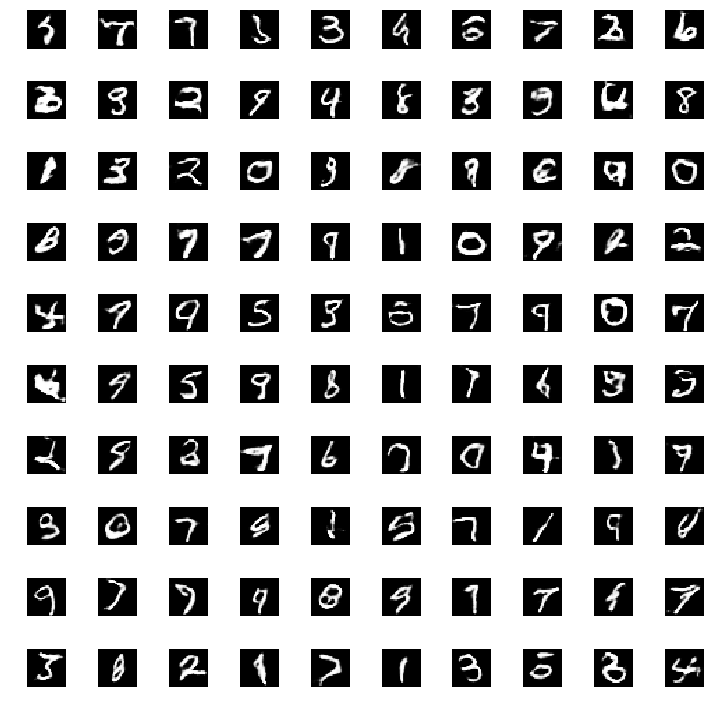

('Epoch is', 23)
('Number of batches', 234)
batch 0 g_loss : 0.945124, d_loss : 0.664736
batch 50 g_loss : 0.818725, d_loss : 0.645123
batch 100 g_loss : 0.889588, d_loss : 0.648170
batch 150 g_loss : 1.132277, d_loss : 0.662592
batch 200 g_loss : 1.262934, d_loss : 0.696943


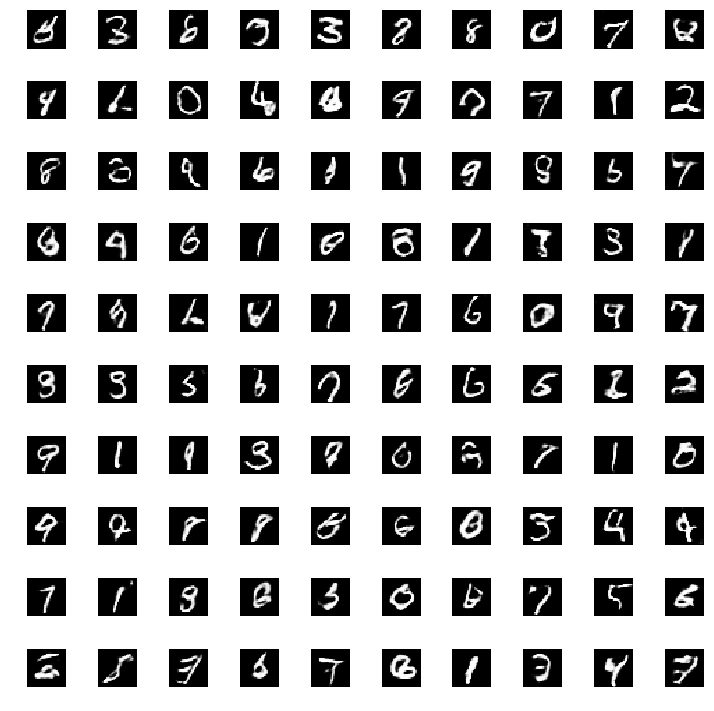

('Epoch is', 24)
('Number of batches', 234)
batch 0 g_loss : 1.179318, d_loss : 0.641380
batch 50 g_loss : 0.882744, d_loss : 0.657458
batch 100 g_loss : 0.813779, d_loss : 0.645901
batch 150 g_loss : 0.855979, d_loss : 0.639855
batch 200 g_loss : 0.970552, d_loss : 0.633482


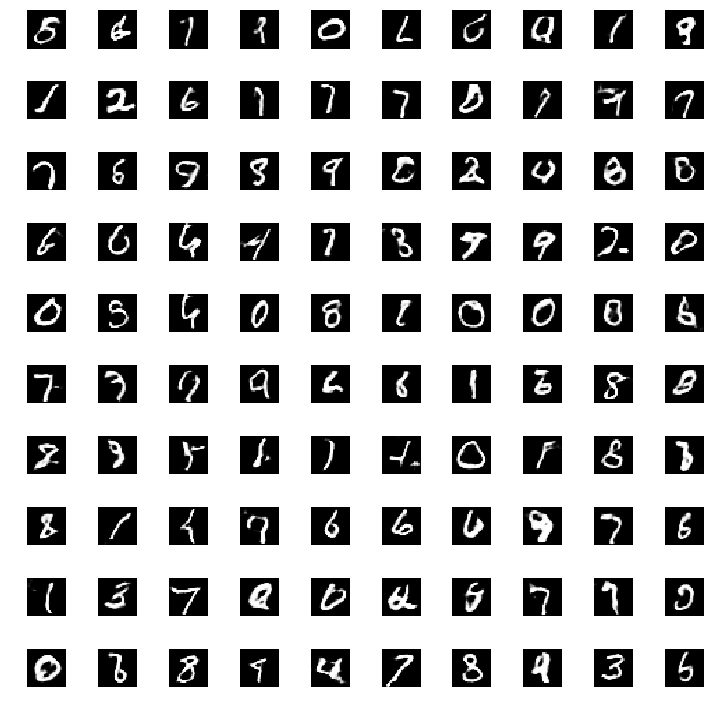

('Epoch is', 25)
('Number of batches', 234)
batch 0 g_loss : 0.973920, d_loss : 0.621685
batch 50 g_loss : 1.002671, d_loss : 0.643255
batch 100 g_loss : 1.028552, d_loss : 0.653283
batch 150 g_loss : 0.893991, d_loss : 0.640602
batch 200 g_loss : 0.914332, d_loss : 0.622648


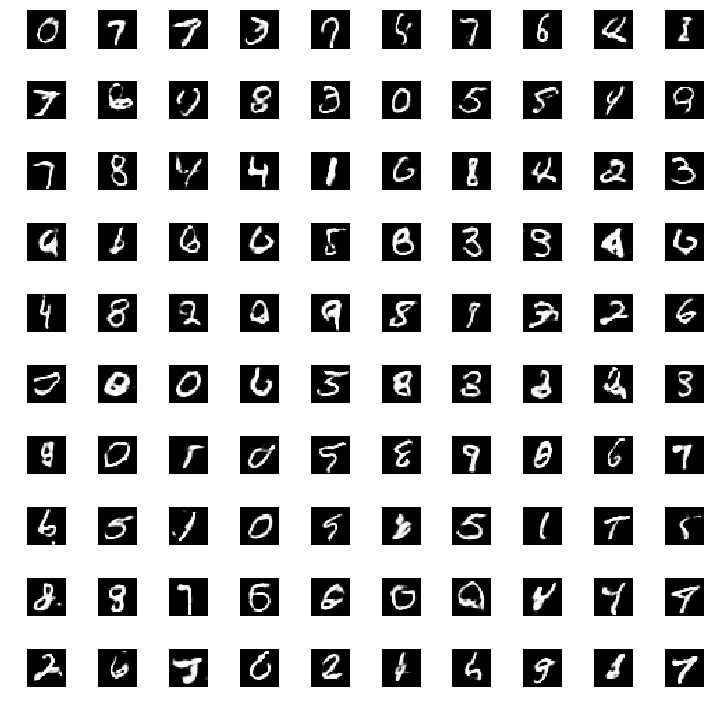

('Epoch is', 26)
('Number of batches', 234)
batch 0 g_loss : 1.021230, d_loss : 0.644151
batch 50 g_loss : 0.899478, d_loss : 0.634156
batch 100 g_loss : 1.078869, d_loss : 0.631938
batch 150 g_loss : 0.967928, d_loss : 0.646912
batch 200 g_loss : 1.118931, d_loss : 0.634408


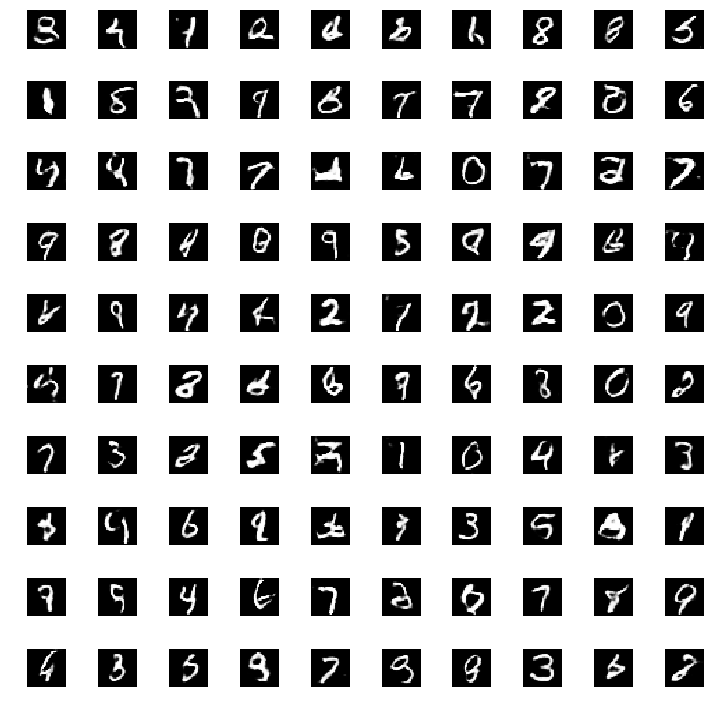

('Epoch is', 27)
('Number of batches', 234)
batch 0 g_loss : 0.838086, d_loss : 0.629729
batch 50 g_loss : 0.858634, d_loss : 0.650384
batch 100 g_loss : 1.071403, d_loss : 0.638769
batch 150 g_loss : 0.762210, d_loss : 0.641330
batch 200 g_loss : 0.918162, d_loss : 0.650672


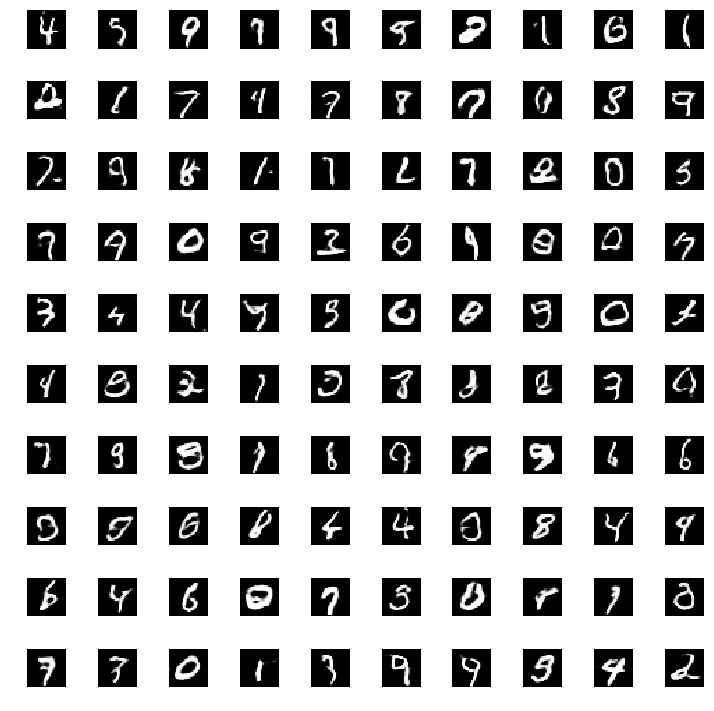

('Epoch is', 28)
('Number of batches', 234)
batch 0 g_loss : 0.978048, d_loss : 0.628249
batch 50 g_loss : 0.880977, d_loss : 0.632030
batch 100 g_loss : 0.972342, d_loss : 0.641225
batch 150 g_loss : 1.082343, d_loss : 0.647955
batch 200 g_loss : 0.995154, d_loss : 0.653363


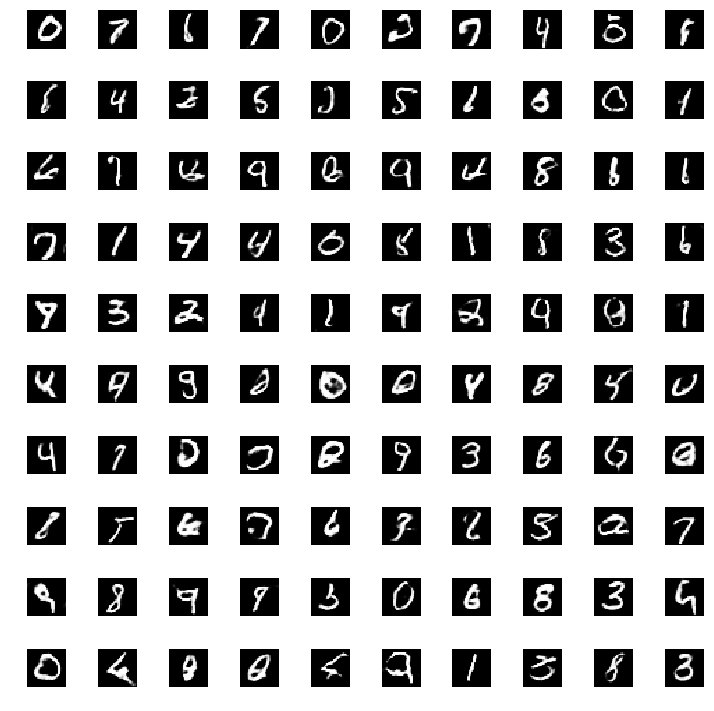

('Epoch is', 29)
('Number of batches', 234)
batch 0 g_loss : 0.858752, d_loss : 0.655033
batch 50 g_loss : 0.901398, d_loss : 0.644578
batch 100 g_loss : 0.992168, d_loss : 0.629805
batch 150 g_loss : 1.062829, d_loss : 0.648246
batch 200 g_loss : 0.862456, d_loss : 0.621005


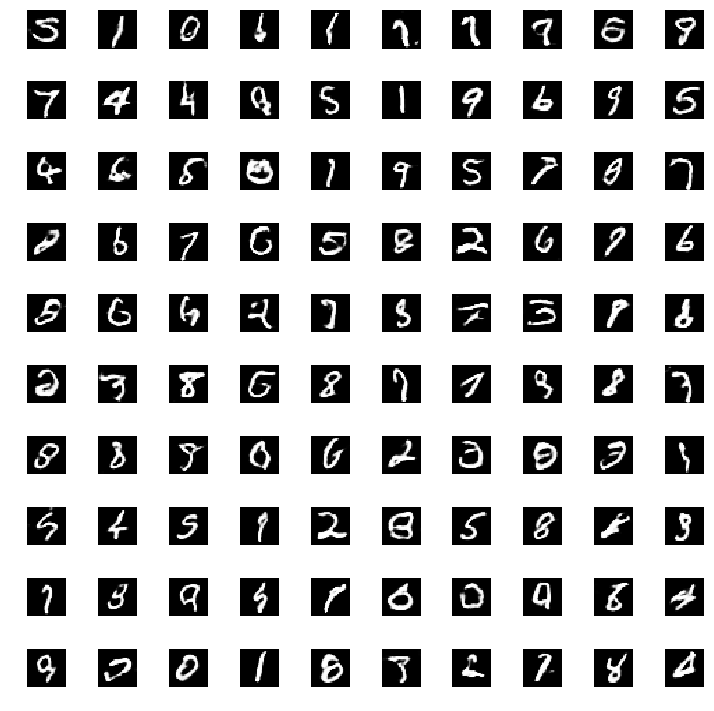

('Epoch is', 30)
('Number of batches', 234)
batch 0 g_loss : 0.921606, d_loss : 0.647213
batch 50 g_loss : 0.930690, d_loss : 0.632610
batch 100 g_loss : 0.931608, d_loss : 0.630487
batch 150 g_loss : 0.957078, d_loss : 0.631508
batch 200 g_loss : 1.214813, d_loss : 0.651482


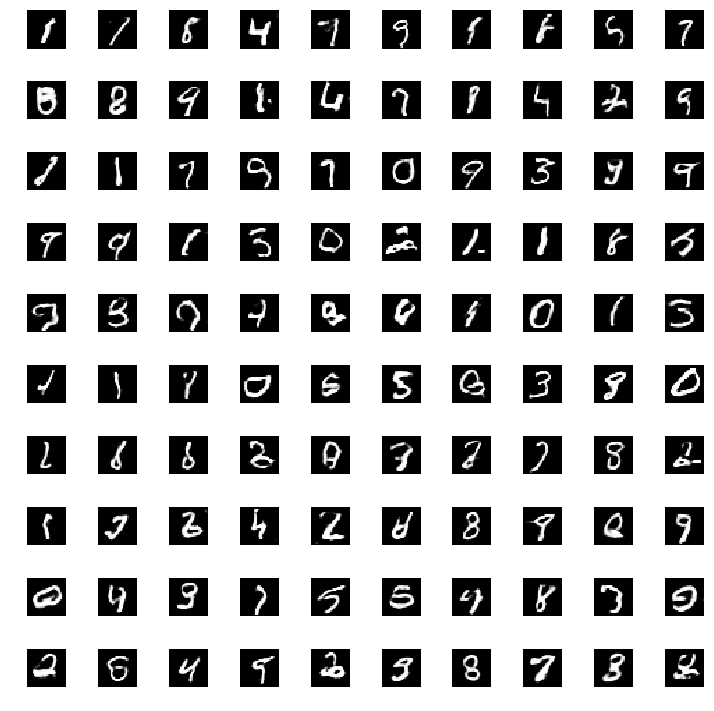

('Epoch is', 31)
('Number of batches', 234)
batch 0 g_loss : 0.919789, d_loss : 0.659533
batch 50 g_loss : 0.921311, d_loss : 0.631911
batch 100 g_loss : 1.154127, d_loss : 0.642589
batch 150 g_loss : 0.964052, d_loss : 0.650470
batch 200 g_loss : 0.785978, d_loss : 0.644066


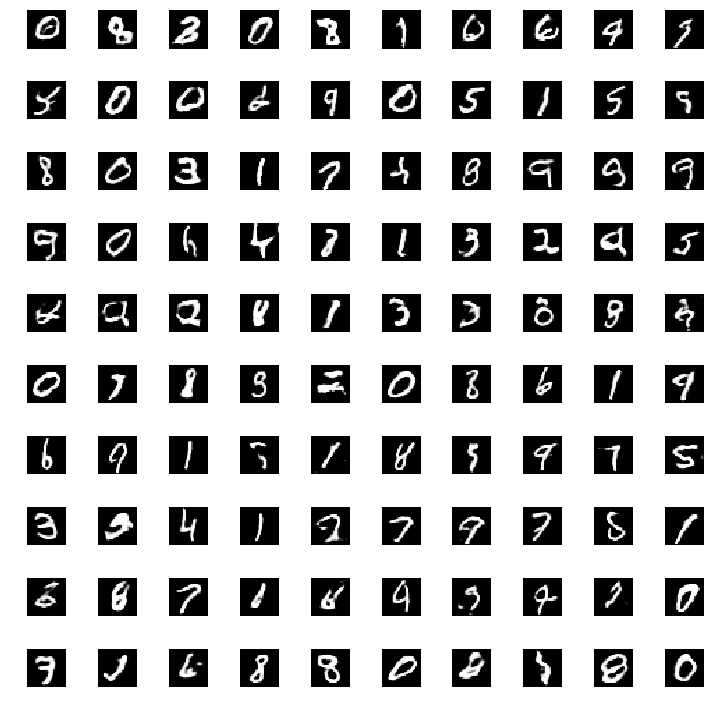

('Epoch is', 32)
('Number of batches', 234)
batch 0 g_loss : 0.972142, d_loss : 0.644413
batch 50 g_loss : 1.133258, d_loss : 0.656831
batch 100 g_loss : 1.021906, d_loss : 0.634343
batch 150 g_loss : 0.908512, d_loss : 0.641328
batch 200 g_loss : 0.928502, d_loss : 0.638402


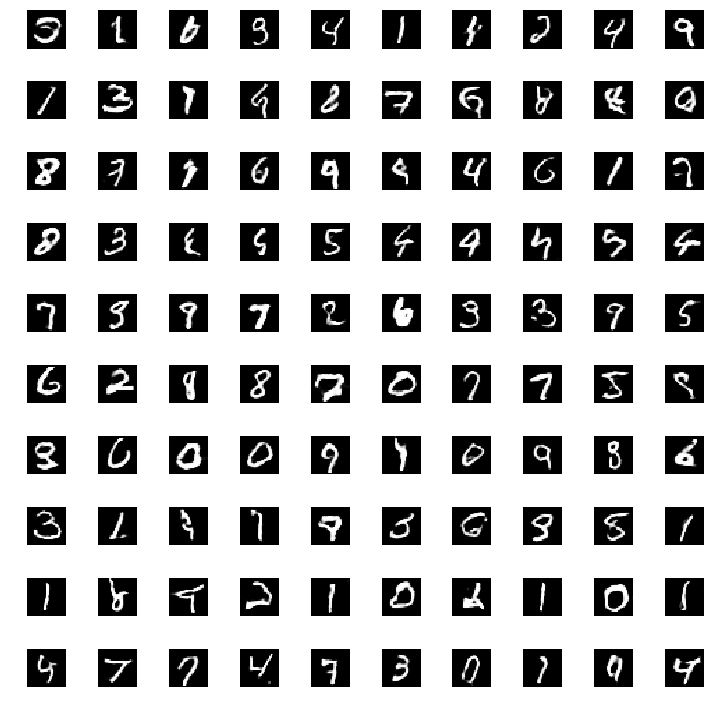

('Epoch is', 33)
('Number of batches', 234)
batch 0 g_loss : 0.979817, d_loss : 0.651059
batch 50 g_loss : 0.952330, d_loss : 0.648342
batch 100 g_loss : 0.920560, d_loss : 0.651032
batch 150 g_loss : 0.976862, d_loss : 0.647184
batch 200 g_loss : 0.982944, d_loss : 0.638613


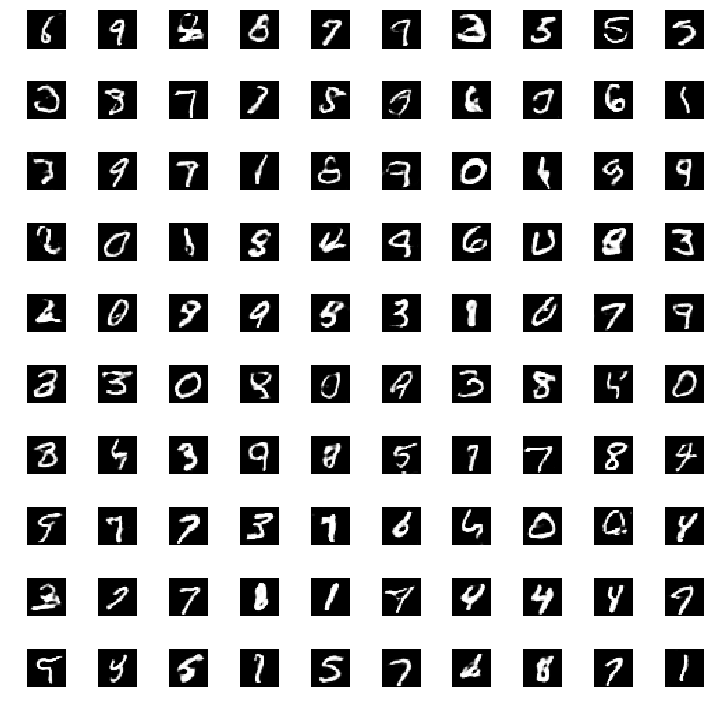

('Epoch is', 34)
('Number of batches', 234)
batch 0 g_loss : 1.056981, d_loss : 0.650198
batch 50 g_loss : 0.824853, d_loss : 0.657630
batch 100 g_loss : 1.063058, d_loss : 0.643715
batch 150 g_loss : 0.823646, d_loss : 0.642172
batch 200 g_loss : 1.049592, d_loss : 0.633016


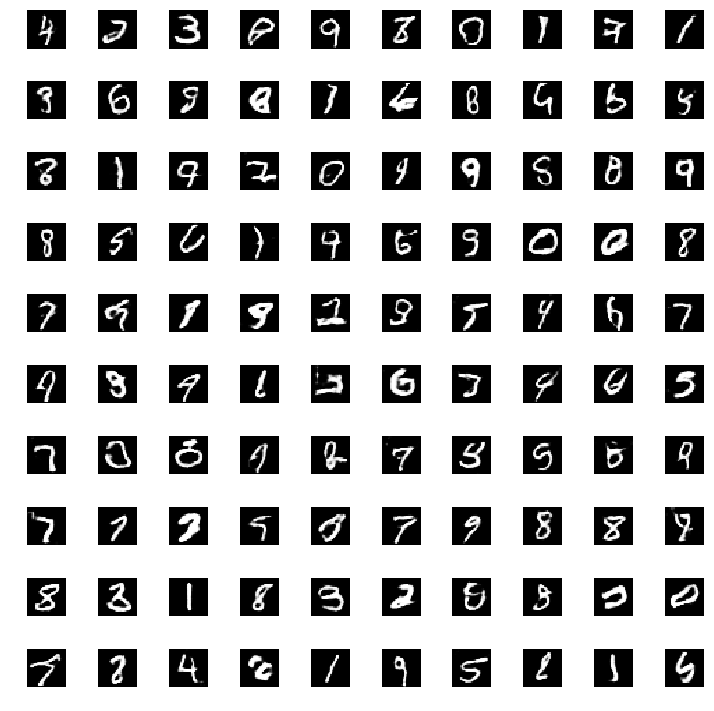

('Epoch is', 35)
('Number of batches', 234)
batch 0 g_loss : 0.854913, d_loss : 0.632091
batch 50 g_loss : 0.843937, d_loss : 0.641805
batch 100 g_loss : 0.914806, d_loss : 0.644216
batch 150 g_loss : 0.969584, d_loss : 0.636123
batch 200 g_loss : 0.825820, d_loss : 0.650162


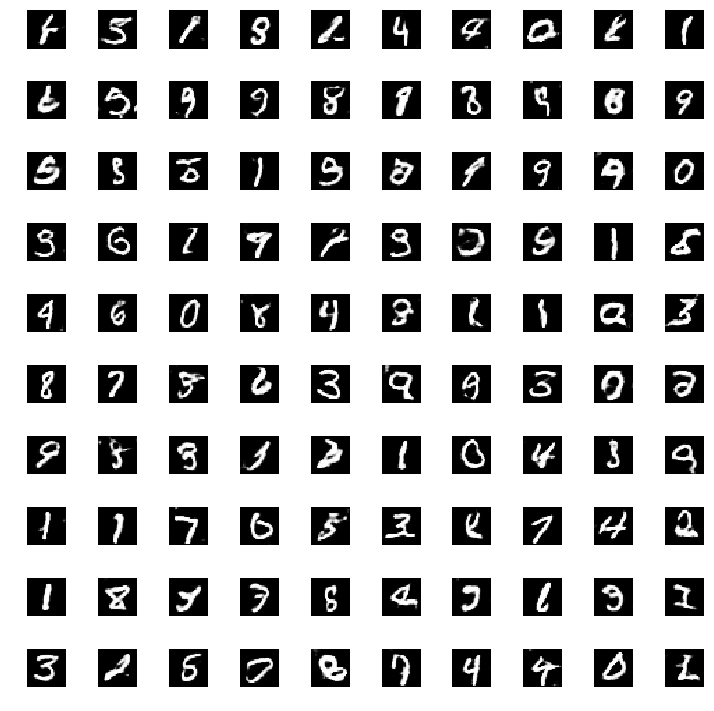

('Epoch is', 36)
('Number of batches', 234)
batch 0 g_loss : 1.094450, d_loss : 0.621164
batch 50 g_loss : 1.005460, d_loss : 0.661129
batch 100 g_loss : 0.973672, d_loss : 0.650386
batch 150 g_loss : 0.996842, d_loss : 0.635919
batch 200 g_loss : 0.899486, d_loss : 0.653800


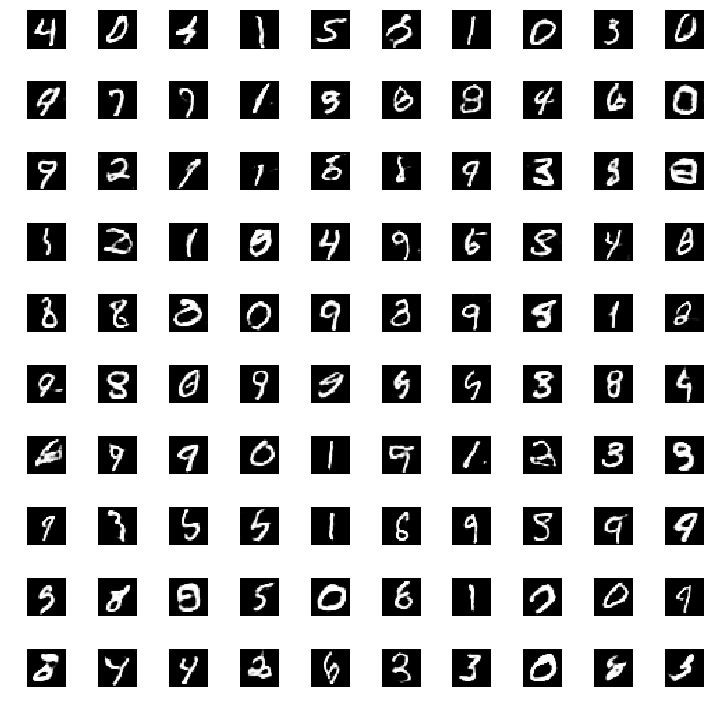

('Epoch is', 37)
('Number of batches', 234)
batch 0 g_loss : 0.865256, d_loss : 0.637174
batch 50 g_loss : 0.947115, d_loss : 0.648943
batch 100 g_loss : 0.927657, d_loss : 0.646884
batch 150 g_loss : 0.924379, d_loss : 0.642749
batch 200 g_loss : 1.041439, d_loss : 0.644865


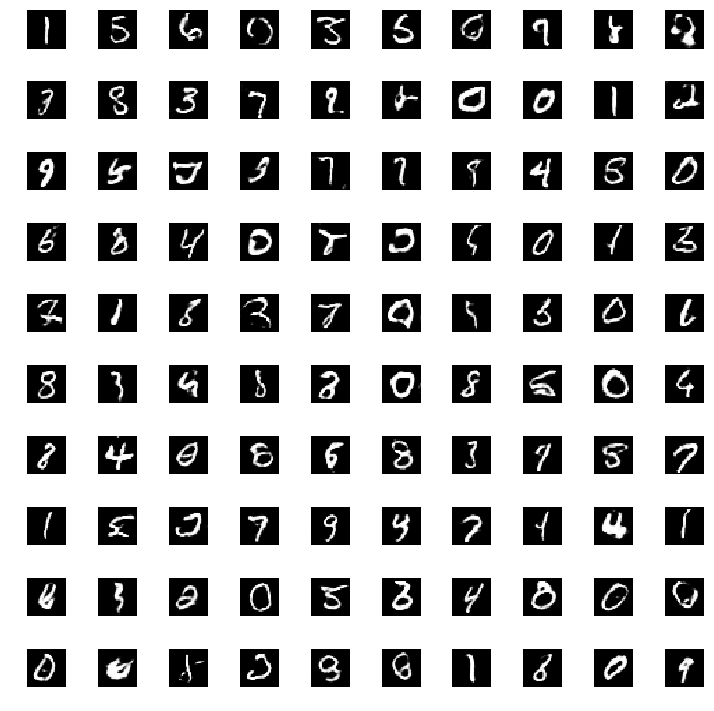

('Epoch is', 38)
('Number of batches', 234)
batch 0 g_loss : 1.034255, d_loss : 0.652220
batch 50 g_loss : 0.920719, d_loss : 0.655397
batch 100 g_loss : 0.968291, d_loss : 0.645038
batch 150 g_loss : 0.857219, d_loss : 0.646632
batch 200 g_loss : 1.049510, d_loss : 0.650923


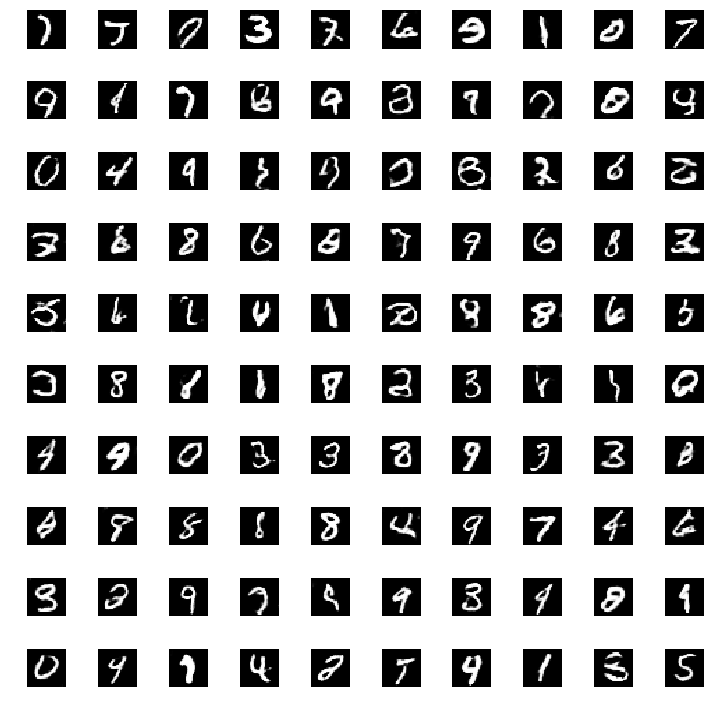

('Epoch is', 39)
('Number of batches', 234)
batch 0 g_loss : 0.862771, d_loss : 0.651525
batch 50 g_loss : 1.028296, d_loss : 0.640128
batch 100 g_loss : 0.877074, d_loss : 0.629761
batch 150 g_loss : 0.990794, d_loss : 0.653274
batch 200 g_loss : 0.950370, d_loss : 0.658780


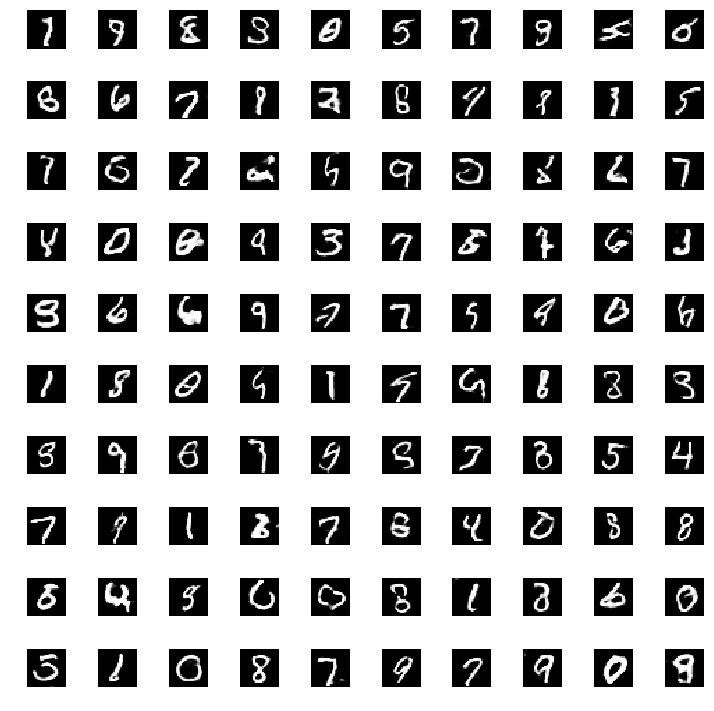

('Epoch is', 40)
('Number of batches', 234)
batch 0 g_loss : 0.862982, d_loss : 0.629384
batch 50 g_loss : 0.930850, d_loss : 0.659079
batch 100 g_loss : 0.866758, d_loss : 0.661563
batch 150 g_loss : 0.949549, d_loss : 0.645356
batch 200 g_loss : 1.068103, d_loss : 0.642226


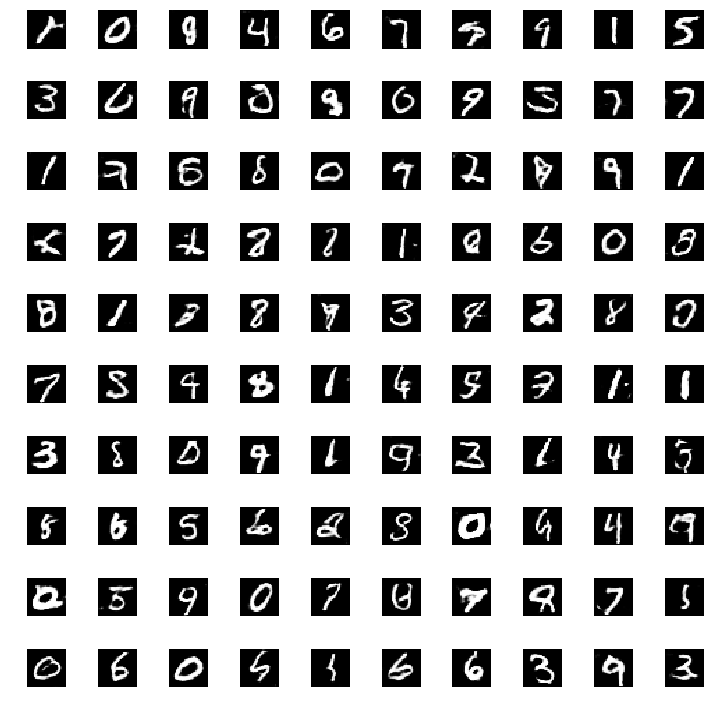

('Epoch is', 41)
('Number of batches', 234)
batch 0 g_loss : 1.070713, d_loss : 0.637264
batch 50 g_loss : 1.169534, d_loss : 0.657190
batch 100 g_loss : 1.028119, d_loss : 0.624760
batch 150 g_loss : 1.002233, d_loss : 0.633382
batch 200 g_loss : 0.898834, d_loss : 0.640616


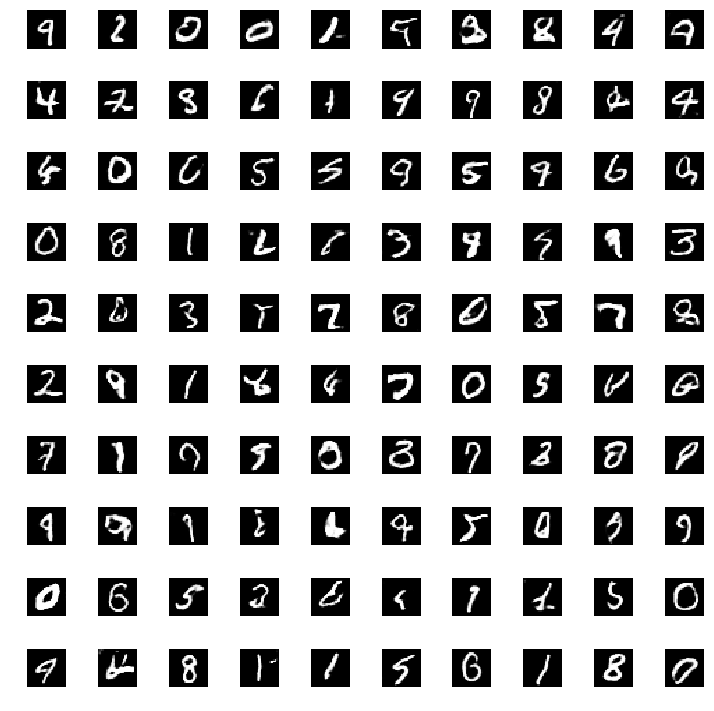

('Epoch is', 42)
('Number of batches', 234)
batch 0 g_loss : 0.869602, d_loss : 0.636071
batch 50 g_loss : 0.976675, d_loss : 0.643642
batch 100 g_loss : 0.926166, d_loss : 0.647963
batch 150 g_loss : 0.887580, d_loss : 0.631430
batch 200 g_loss : 1.153238, d_loss : 0.643822


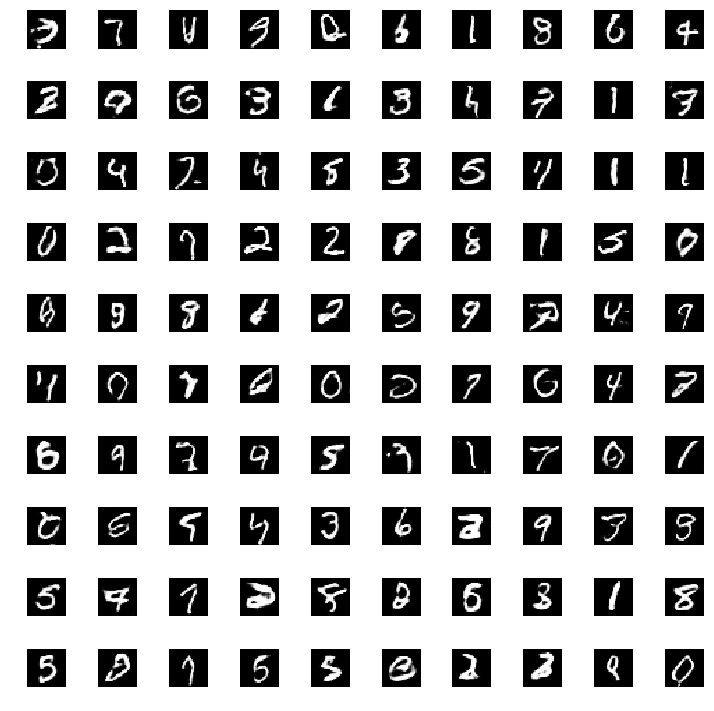

('Epoch is', 43)
('Number of batches', 234)
batch 0 g_loss : 0.962109, d_loss : 0.639676
batch 50 g_loss : 0.853166, d_loss : 0.658238
batch 100 g_loss : 0.980897, d_loss : 0.656658
batch 150 g_loss : 0.921392, d_loss : 0.623527
batch 200 g_loss : 0.920542, d_loss : 0.652871


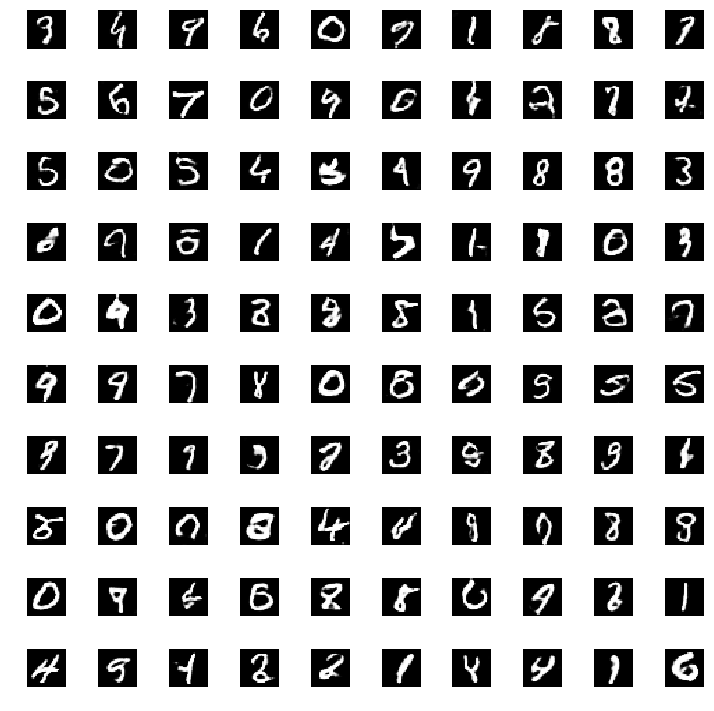

('Epoch is', 44)
('Number of batches', 234)
batch 0 g_loss : 0.920294, d_loss : 0.628008
batch 50 g_loss : 0.834055, d_loss : 0.642303
batch 100 g_loss : 0.880401, d_loss : 0.647802
batch 150 g_loss : 0.944340, d_loss : 0.640816
batch 200 g_loss : 1.005685, d_loss : 0.648208


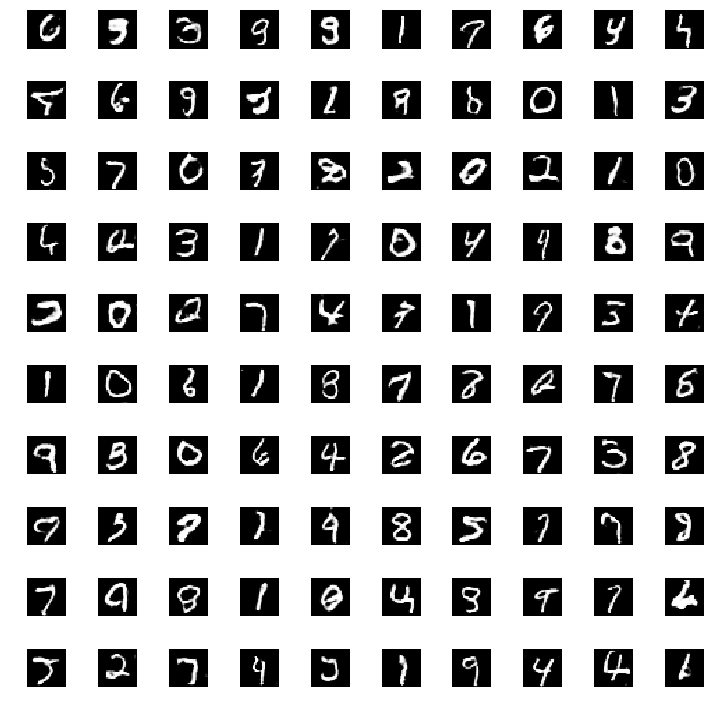

('Epoch is', 45)
('Number of batches', 234)
batch 0 g_loss : 0.881300, d_loss : 0.628312
batch 50 g_loss : 0.989178, d_loss : 0.632971
batch 100 g_loss : 0.917860, d_loss : 0.636343
batch 150 g_loss : 0.816302, d_loss : 0.646794
batch 200 g_loss : 1.011799, d_loss : 0.642627


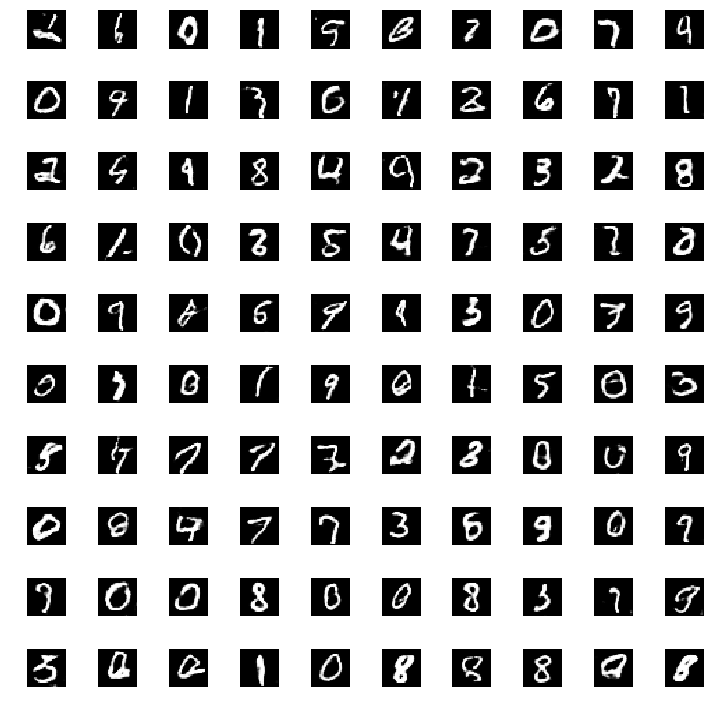

('Epoch is', 46)
('Number of batches', 234)
batch 0 g_loss : 0.977876, d_loss : 0.632529
batch 50 g_loss : 0.834597, d_loss : 0.642293
batch 100 g_loss : 0.995250, d_loss : 0.639879
batch 150 g_loss : 0.879108, d_loss : 0.639387
batch 200 g_loss : 1.014282, d_loss : 0.650986


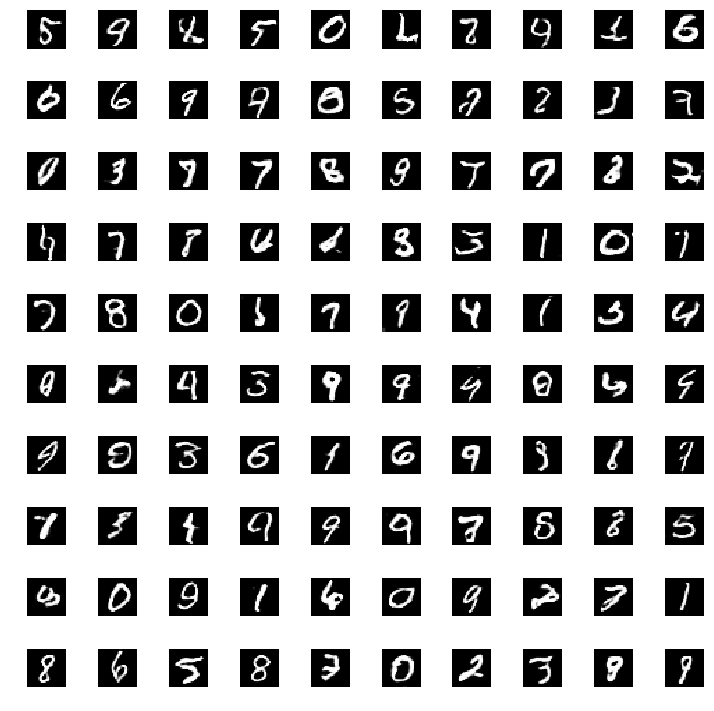

('Epoch is', 47)
('Number of batches', 234)
batch 0 g_loss : 0.845605, d_loss : 0.629346
batch 50 g_loss : 0.771224, d_loss : 0.654024
batch 100 g_loss : 0.897670, d_loss : 0.646686
batch 150 g_loss : 0.850958, d_loss : 0.660867
batch 200 g_loss : 0.787013, d_loss : 0.646119


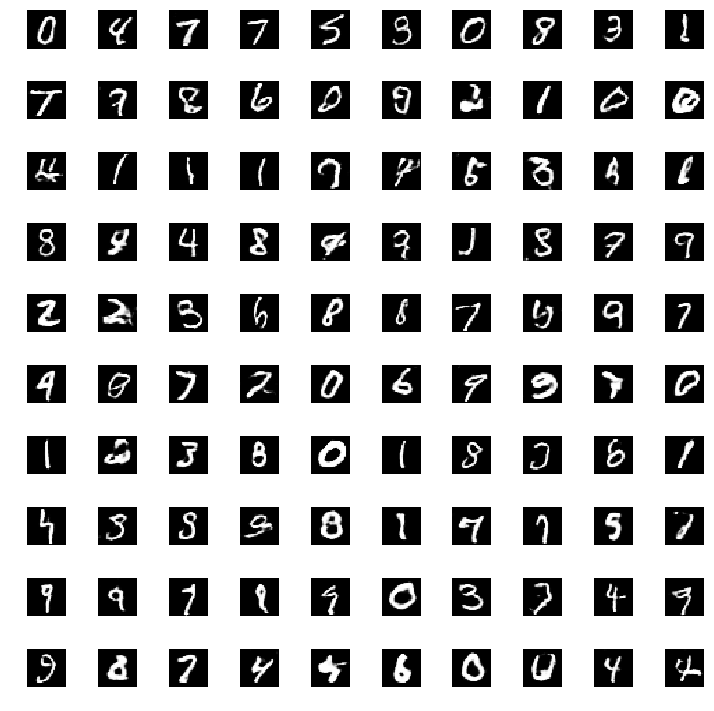

('Epoch is', 48)
('Number of batches', 234)
batch 0 g_loss : 1.120015, d_loss : 0.647820
batch 50 g_loss : 0.934023, d_loss : 0.645304
batch 100 g_loss : 1.051329, d_loss : 0.635890
batch 150 g_loss : 1.053938, d_loss : 0.653201
batch 200 g_loss : 0.859751, d_loss : 0.631656


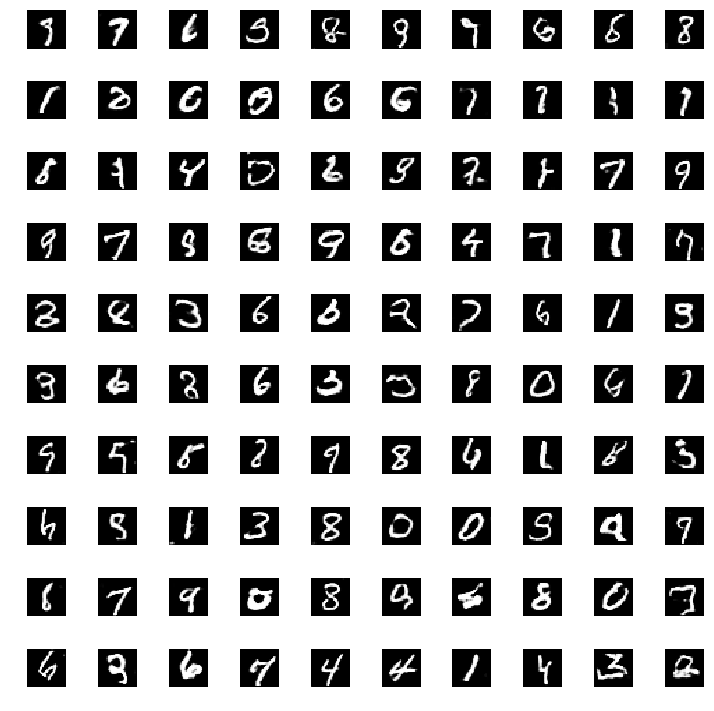

('Epoch is', 49)
('Number of batches', 234)
batch 0 g_loss : 0.955320, d_loss : 0.638624
batch 50 g_loss : 0.999033, d_loss : 0.644260
batch 100 g_loss : 1.078791, d_loss : 0.638744
batch 150 g_loss : 0.862789, d_loss : 0.627912
batch 200 g_loss : 0.982247, d_loss : 0.635175


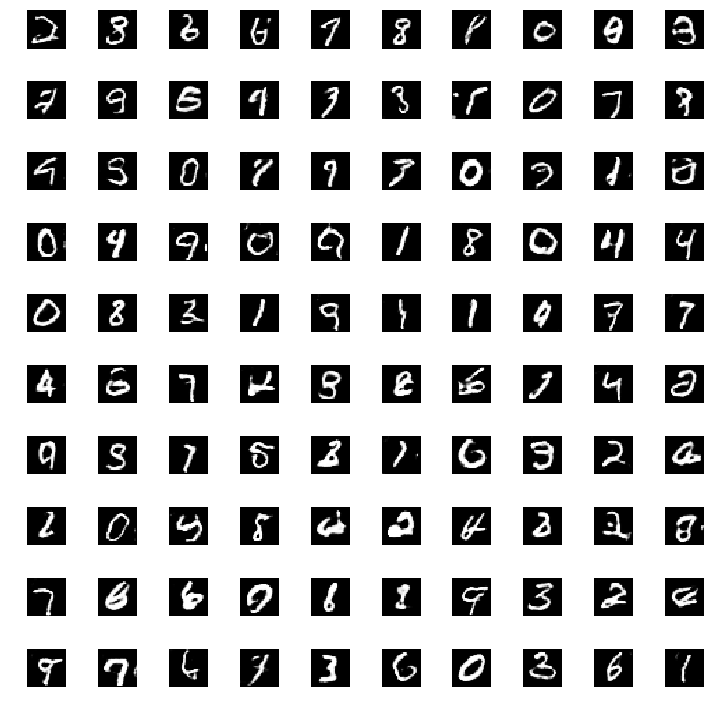

('Epoch is', 50)
('Number of batches', 234)
batch 0 g_loss : 0.939889, d_loss : 0.639468
batch 50 g_loss : 0.888454, d_loss : 0.656923
batch 100 g_loss : 0.906933, d_loss : 0.631218
batch 150 g_loss : 0.876475, d_loss : 0.631174
batch 200 g_loss : 1.061563, d_loss : 0.642279


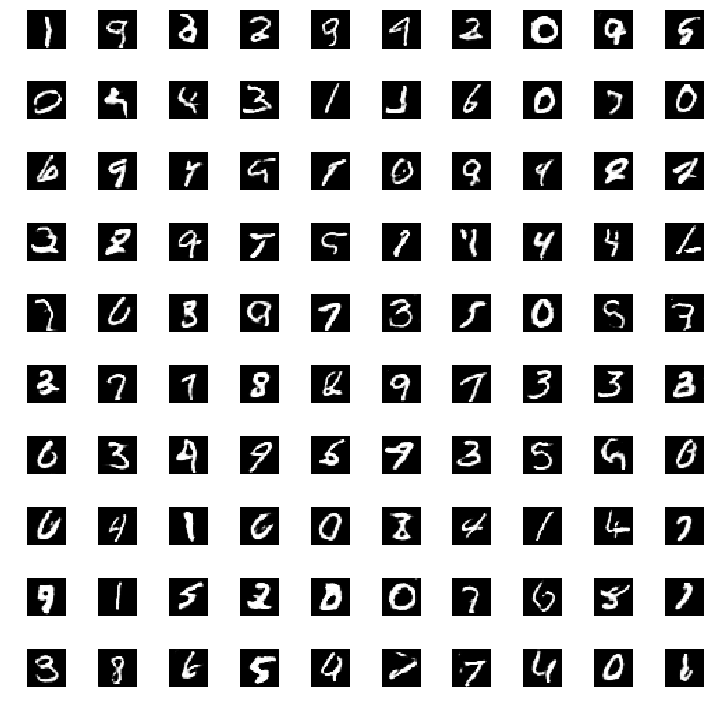

('Epoch is', 51)
('Number of batches', 234)
batch 0 g_loss : 0.945557, d_loss : 0.634213
batch 50 g_loss : 1.104057, d_loss : 0.657630
batch 100 g_loss : 1.013803, d_loss : 0.632182
batch 150 g_loss : 1.002799, d_loss : 0.639853
batch 200 g_loss : 1.039080, d_loss : 0.636335


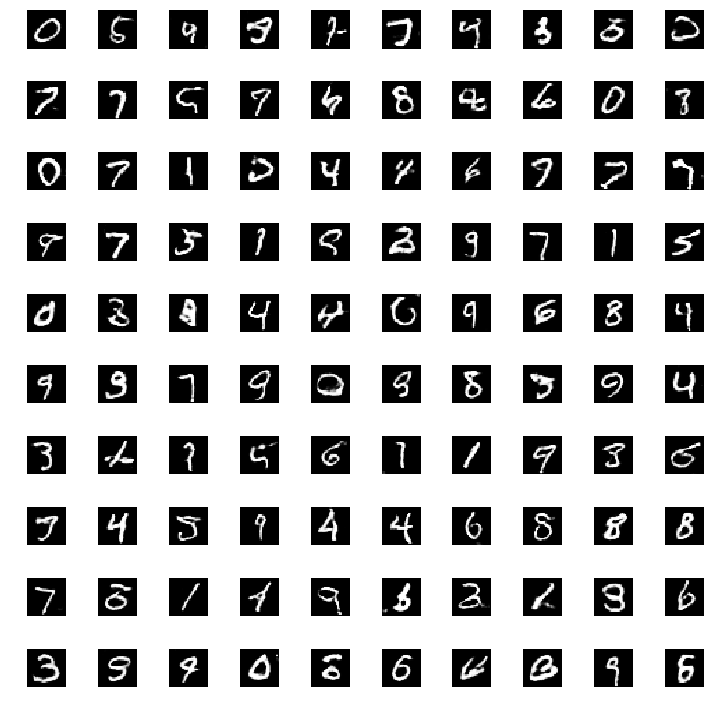

('Epoch is', 52)
('Number of batches', 234)
batch 0 g_loss : 1.316323, d_loss : 0.673761
batch 50 g_loss : 1.411686, d_loss : 0.674496
batch 100 g_loss : 0.961894, d_loss : 0.630924
batch 150 g_loss : 0.986515, d_loss : 0.660826
batch 200 g_loss : 0.966661, d_loss : 0.646062


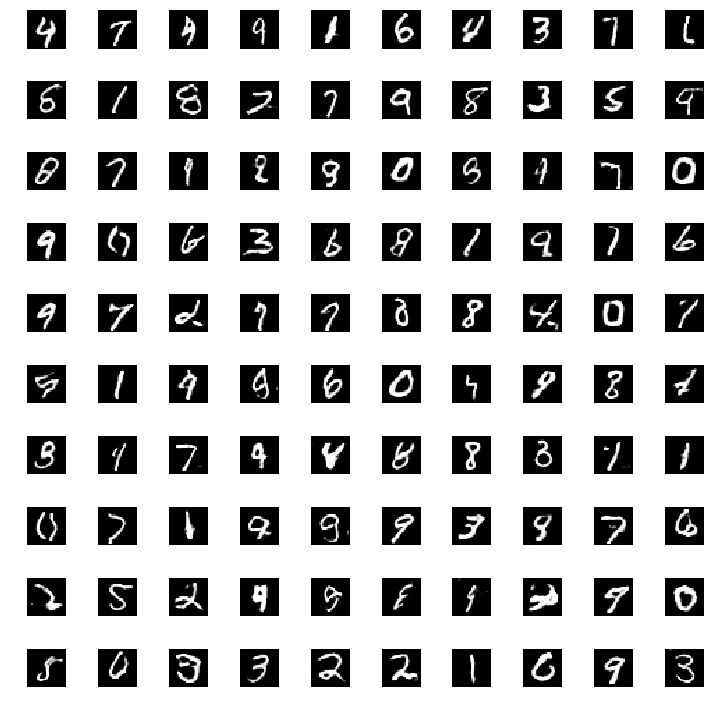

('Epoch is', 53)
('Number of batches', 234)
batch 0 g_loss : 1.079730, d_loss : 0.644905
batch 50 g_loss : 0.910832, d_loss : 0.634802
batch 100 g_loss : 0.871387, d_loss : 0.640625
batch 150 g_loss : 0.980676, d_loss : 0.664105
batch 200 g_loss : 1.048871, d_loss : 0.630764


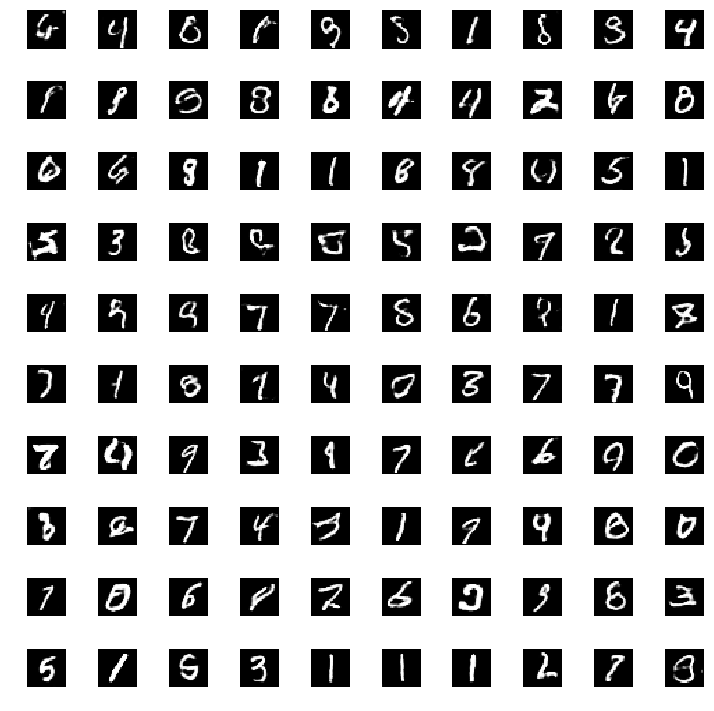

('Epoch is', 54)
('Number of batches', 234)
batch 0 g_loss : 0.961293, d_loss : 0.648882
batch 50 g_loss : 0.821629, d_loss : 0.654799
batch 100 g_loss : 1.142923, d_loss : 0.635191
batch 150 g_loss : 0.971340, d_loss : 0.655760
batch 200 g_loss : 1.067824, d_loss : 0.635807


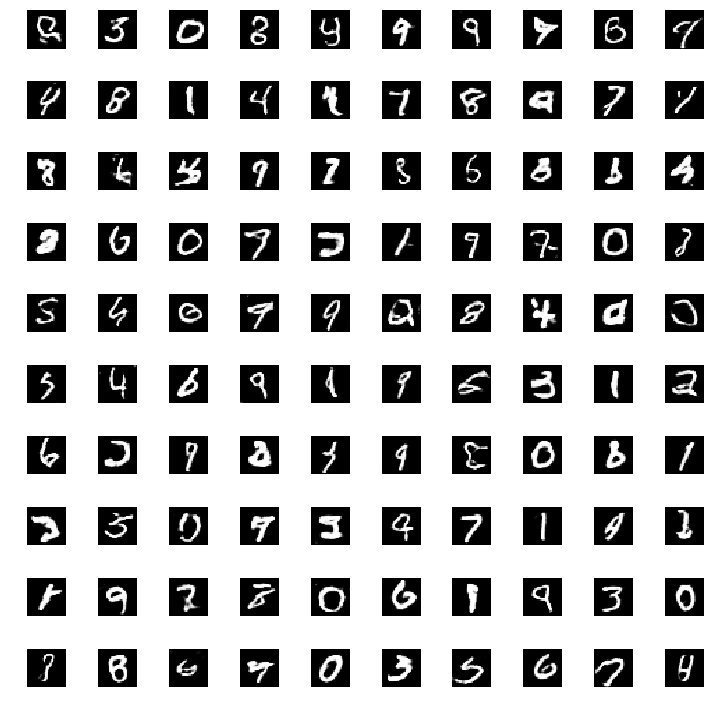

('Epoch is', 55)
('Number of batches', 234)
batch 0 g_loss : 1.005413, d_loss : 0.623934
batch 50 g_loss : 0.954430, d_loss : 0.663637
batch 100 g_loss : 0.728644, d_loss : 0.621572
batch 150 g_loss : 0.950786, d_loss : 0.642837
batch 200 g_loss : 1.042146, d_loss : 0.640931


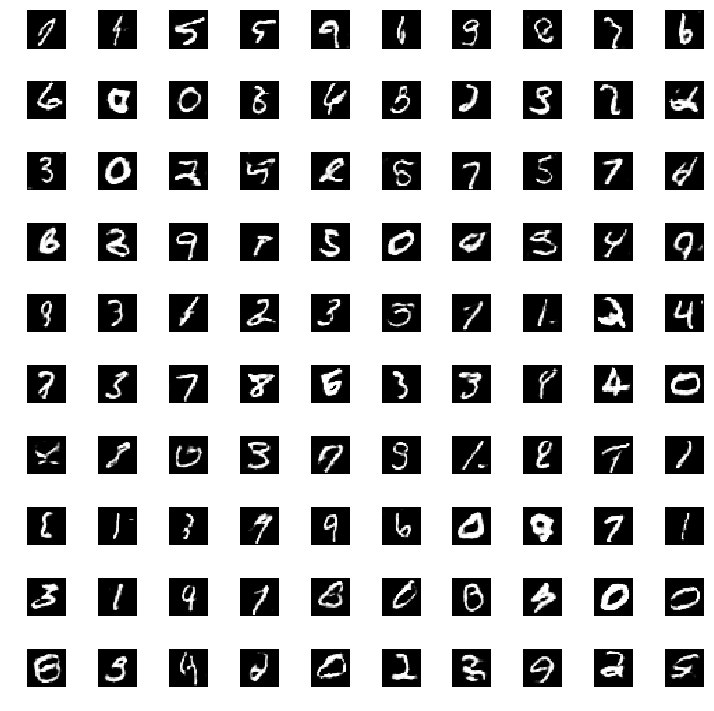

('Epoch is', 56)
('Number of batches', 234)
batch 0 g_loss : 1.064572, d_loss : 0.646954
batch 50 g_loss : 0.948630, d_loss : 0.653601
batch 100 g_loss : 1.014801, d_loss : 0.620472
batch 150 g_loss : 1.095054, d_loss : 0.650759
batch 200 g_loss : 0.923044, d_loss : 0.623098


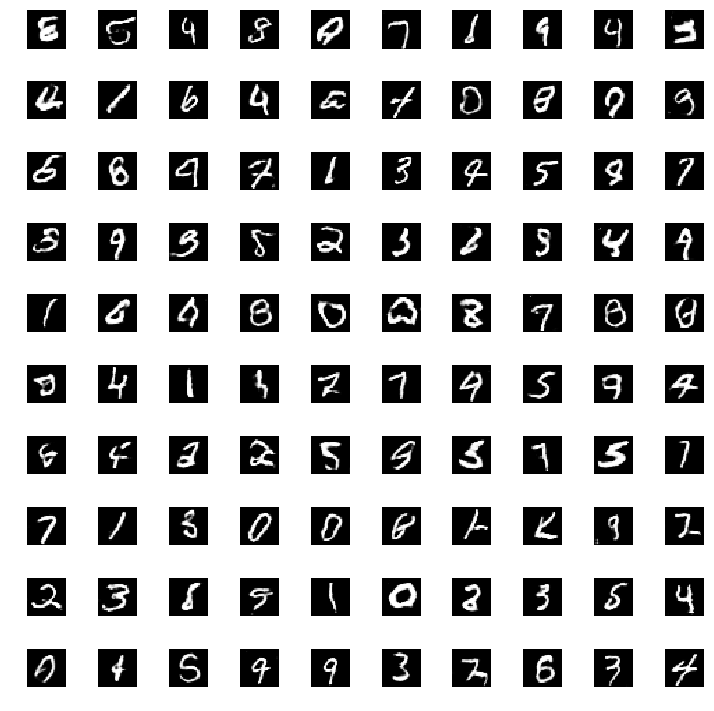

('Epoch is', 57)
('Number of batches', 234)
batch 0 g_loss : 0.992587, d_loss : 0.630549
batch 50 g_loss : 0.954306, d_loss : 0.613126
batch 100 g_loss : 0.887012, d_loss : 0.633197
batch 150 g_loss : 0.973575, d_loss : 0.632371
batch 200 g_loss : 0.908531, d_loss : 0.649248


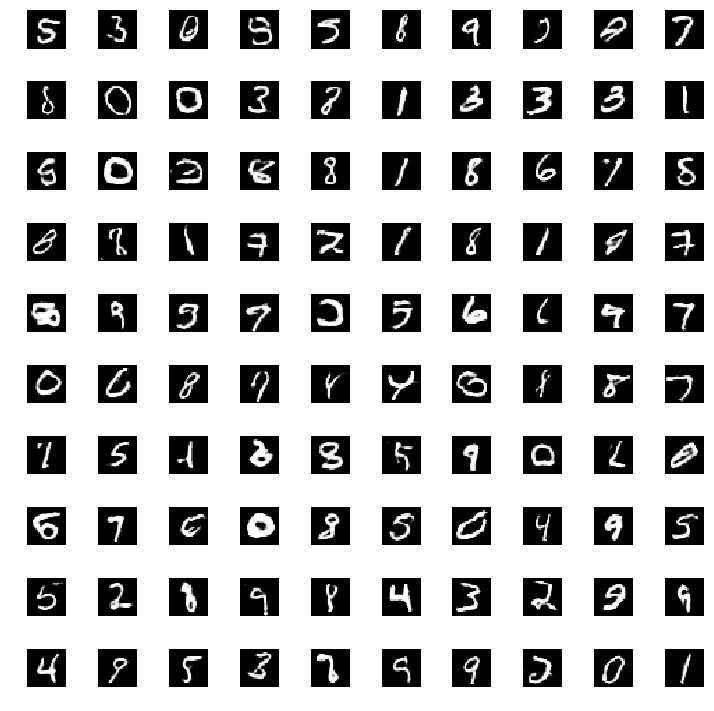

('Epoch is', 58)
('Number of batches', 234)
batch 0 g_loss : 1.103000, d_loss : 0.656383
batch 50 g_loss : 0.995970, d_loss : 0.638672
batch 100 g_loss : 1.092003, d_loss : 0.651830
batch 150 g_loss : 0.960389, d_loss : 0.640342
batch 200 g_loss : 0.921108, d_loss : 0.637244


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, :, :, None]
X_test = X_test[:, :, :, None]

EPOCH = 50
BATCH_SIZE = 256

for EPOCH in range(100):
    print("Epoch is", EPOCH)
    print("Number of batches", int(X_train.shape[0]/BATCH_SIZE))
    for index in range(int(X_train.shape[0]/BATCH_SIZE)):
        # Get a random set of input noise and images
        noise = np.random.normal(0, 1, size=[BATCH_SIZE, 100])
        imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)]
        # Generate fake MNIST images
        generatedImages = G.predict(noise)
        X = np.concatenate([imageBatch, generatedImages])
        # Labels for generated and real data
        yDis = np.zeros(2*BATCH_SIZE)
        # One-sided label smoothing from improved WGAN
        yDis[:BATCH_SIZE] = 0.9
        # Train discriminator
        D.trainable = True
        d_loss = D.train_on_batch(X, yDis)
        # Train generator
        noise = np.random.normal(0, 1, size=[BATCH_SIZE, 100])
        yGen = np.ones(BATCH_SIZE)
        D.trainable = False
        g_loss = GAN.train_on_batch(noise, yGen)   
        if index % 50 == 0:
            print("batch %d g_loss : %f, d_loss : %f" % (index, g_loss, d_loss))
        
    try_input = np.random.normal(0, 1, size=[100, 100])
    preds = G.predict(try_input)
    plt.figure(figsize=(10,10))
    for i in range(preds.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(preds[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()